In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from tqdm import tqdm
import time

train = pd.read_csv("CSV_train.csv",low_memory=False,delimiter=';', error_bad_lines=False)
test=pd.read_csv("CSV_test.csv",low_memory=False,delimiter=',', error_bad_lines=False)
hidden=pd.read_csv("CSV_hidden_test.csv",low_memory=False,delimiter=',', error_bad_lines=False)

test.info()

# storing length of datasets 
train_len = train.shape[0] 
test_len = test.shape[0]
All_data = pd.concat((train,test,hidden)).reset_index(drop=True) 

lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
All_data['Lithology'] = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
All_data



C:\Users\Ayori\AppData\Local\Temp/ipykernel_3328/2800711385.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("CSV_train.csv",low_memory=False,delimiter=';', error_bad_lines=False)
C:\Users\Ayori\AppData\Local\Temp/ipykernel_3328/2800711385.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test=pd.read_csv("CSV_test.csv",low_memory=False,delimiter=',', error_bad_lines=False)
C:\Users\Ayori\AppData\Local\Temp/ipykernel_3328/2800711385.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  hidden=pd.read_csv("CSV_hidden_test.csv",low_memory=False,delimiter=',', error_bad_lines=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136786 entries, 0 to 136785
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   WELL                              136786 non-null  object 
 1   DEPTH_MD                          136786 non-null  float64
 2   X_LOC                             136727 non-null  float64
 3   Y_LOC                             136727 non-null  float64
 4   Z_LOC                             136727 non-null  float64
 5   GROUP                             136786 non-null  object 
 6   FORMATION                         129712 non-null  object 
 7   CALI                              131141 non-null  float64
 8   RSHA                              39097 non-null   float64
 9   RMED                              136199 non-null  float64
 10  RDEP                              136727 non-null  float64
 11  RHOB                              119826 non-null  f

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,Lithology
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,35/9-7,2973.2988,536096.06250,6793022.0,-2943.444580,BAAT GP.,Etive Fm.,8.276272,NaN,2.820439,...,136.911575,NaN,0.502458,NaN,2.311106,24.306124,NaN,65000,2.0,Shale
1429690,35/9-7,2973.4508,536096.06250,6793022.0,-2943.595947,BAAT GP.,Etive Fm.,8.267273,NaN,3.020778,...,137.583923,NaN,0.374753,NaN,1.853418,22.201078,NaN,65000,2.0,Shale
1429691,35/9-7,2973.6028,536096.06250,6793022.0,-2943.747559,BAAT GP.,Etive Fm.,8.250099,NaN,2.795711,...,138.310898,NaN,0.211487,NaN,1.325961,20.096741,NaN,65000,2.0,Shale
1429692,35/9-7,2973.7548,536096.06250,6793022.0,-2943.899170,BAAT GP.,Etive Fm.,NaN,NaN,2.658694,...,137.592819,NaN,0.147950,NaN,1.260347,17.992323,NaN,65000,2.0,Shale


In [2]:
#dropping columns with high missing values
drop_cols = ['SGR', 'ROPA', 'RXO', 'MUDWEIGHT','DCAL','RMIC','FORCE_2020_LITHOFACIES_CONFIDENCE']
All_data_drop = All_data.drop(drop_cols, axis=1)



#dropping categorial features replaces beforehan by encoded features
drop2 = All_data_drop.drop(['GROUP', 'FORMATION','WELL','FORCE_2020_LITHOFACIES_LITHOLOGY','Lithology'], axis=1)



Splitted training data shape is (122229, 17) and validation data shape is (52384, 17)


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:151.68956
[99]	validation_0-rmse:10.94011
Train error: 152.00729369859374
Validation error: 159.70971679585938


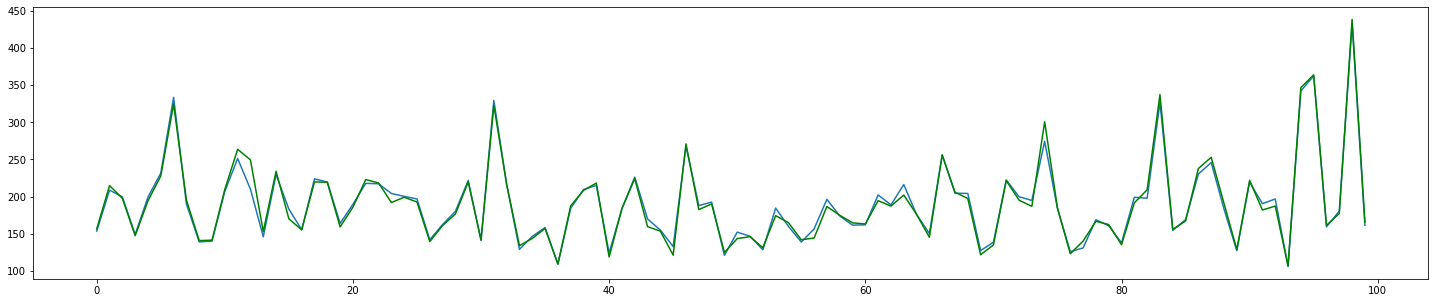

In [3]:
# splitting dataset into training, test, and hidden sets
train_prep = drop2[:train_len].copy()
test_prep = drop2[train_len:(train_len+test_len)].copy()
hidden_prep = drop2[(train_len+test_len):].copy()

# All_data_drop.columns

from sklearn.model_selection import train_test_split

# DTS training Data
train_dts = train_prep[train_prep.DTS.notna()]

#Labels and faatures
X_dts = train_dts.drop(['DTS'], axis=1)
Y_dts = train_dts['DTS']

#Imputation
X_dts_inp = X_dts.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into dts_train and dts_validation sets
X_dts_train, X_dts_val, Y_dts_train, Y_dts_val = train_test_split(X_dts_inp, Y_dts, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_dts_train.shape, X_dts_val.shape))

#Predicting DTS
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_dts_train, Y_dts_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_dts_val, Y_dts_val)], verbose=100)

train_pred = model1000.predict(X_dts_train)
val_pred = model1000.predict(X_dts_val)

print('Train error:', max_error(Y_dts_train, train_pred))
print('Validation error:', max_error(Y_dts_val, val_pred))

#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_dts_val[25000:25100])
plt.plot(list(range(100)), val_pred[25000:25100], color='g')

# Filling nan values before predicting DTS
X_train_DTS = train_prep.drop(['DTS'], axis=1)
X_train_DTS2 = X_train_DTS.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_DTS = test_prep.drop(['DTS'], axis=1)
X_test_DTS2 = X_test_DTS.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_DTS = hidden_prep.drop(['DTS'], axis=1)
X_hidden_DTS2 = X_hidden_DTS.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting DTS (COMPLETE DATASETS)
train_prep['DTS_pred'] = model1000.predict(X_train_DTS2)
test_prep['DTS_pred'] = model1000.predict(X_test_DTS2)
hidden_prep['DTS_pred'] = model1000.predict(X_hidden_DTS2)

#Inputing nan values in DTS with DTS_PREDICTED
train_prep['DTS_COMB'] = train_prep['DTS']
train_prep['DTS_COMB'].fillna(train_prep['DTS_pred'], inplace=True)

test_prep['DTS_COMB'] = test_prep['DTS']
test_prep['DTS_COMB'].fillna(test_prep['DTS_pred'], inplace=True)

hidden_prep['DTS_COMB'] = hidden_prep['DTS']
hidden_prep['DTS_COMB'].fillna(hidden_prep['DTS_pred'], inplace=True)

In [4]:
train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   DEPTH_MD  1170511 non-null  float64
 1   X_LOC     1159736 non-null  float64
 2   Y_LOC     1159736 non-null  float64
 3   Z_LOC     1159736 non-null  float64
 4   CALI      1082634 non-null  float64
 5   RSHA      630650 non-null   float64
 6   RMED      1131518 non-null  float64
 7   RDEP      1159496 non-null  float64
 8   RHOB      1009242 non-null  float64
 9   GR        1170511 non-null  float64
 10  NPHI      765409 non-null   float64
 11  PEF       671692 non-null   float64
 12  DTC       1089648 non-null  float64
 13  SP        864247 non-null   float64
 14  BS        682657 non-null   float64
 15  ROP       535071 non-null   float64
 16  DTS       174613 non-null   float64
 17  DRHO      987857 non-null   float64
 18  DTS_pred  1170511 non-null  float32
 19  DTS_COMB  1170511 non

In [5]:
train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   DEPTH_MD  1170511 non-null  float64
 1   X_LOC     1159736 non-null  float64
 2   Y_LOC     1159736 non-null  float64
 3   Z_LOC     1159736 non-null  float64
 4   CALI      1082634 non-null  float64
 5   RSHA      630650 non-null   float64
 6   RMED      1131518 non-null  float64
 7   RDEP      1159496 non-null  float64
 8   RHOB      1009242 non-null  float64
 9   GR        1170511 non-null  float64
 10  NPHI      765409 non-null   float64
 11  PEF       671692 non-null   float64
 12  DTC       1089648 non-null  float64
 13  SP        864247 non-null   float64
 14  BS        682657 non-null   float64
 15  ROP       535071 non-null   float64
 16  DTS       174613 non-null   float64
 17  DRHO      987857 non-null   float64
 18  DTS_pred  1170511 non-null  float32
 19  DTS_COMB  1170511 non

Splitted training data shape is (535786, 19) and validation data shape is (229623, 19)


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:0.15556
[99]	validation_0-rmse:0.03473
Train error: 0.5261629224230346
Validation error: 0.6599538399944763


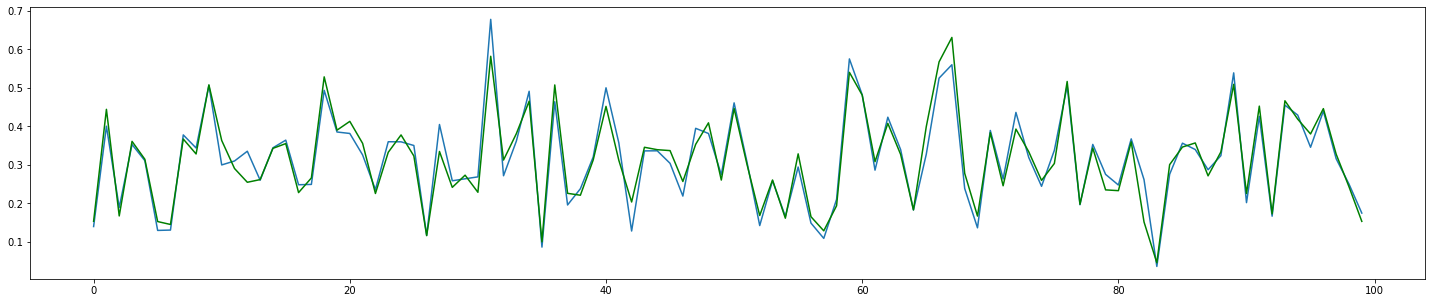

In [6]:
from sklearn.model_selection import train_test_split

# NPHI training Data
train_nphi = train_prep[train_prep.NPHI.notna()]

#Labels and faatures
X_nphi = train_nphi.drop(['NPHI'], axis=1)
Y_nphi = train_nphi['NPHI']

#Imputation
X_nphi_inp = X_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into nphi_train and nphi_validation sets
X_nphi_train, X_nphi_val, Y_nphi_train, Y_nphi_val = train_test_split(X_nphi_inp, Y_nphi, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_nphi_train.shape, X_nphi_val.shape))
#Predicting NPHI
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_nphi_train, Y_nphi_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_nphi_val, Y_nphi_val)], verbose=100)

train_pred1 = model1000.predict(X_nphi_train)
val_pred1 = model1000.predict(X_nphi_val)

print('Train error:', max_error(Y_nphi_train, train_pred1))
print('Validation error:', max_error(Y_nphi_val, val_pred1))
#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_nphi_val[25000:25100])
plt.plot(list(range(100)), val_pred1[25000:25100], color='g')

# Filling nan values before predicting nphi
X_train_nphi = train_prep.drop(['NPHI'], axis=1)
X_train_nphi2 = X_train_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_nphi = test_prep.drop(['NPHI'], axis=1)
X_test_nphi2 = X_test_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_nphi = hidden_prep.drop(['NPHI'], axis=1)
X_hidden_nphi2 = X_hidden_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting nphi (COMPLETE DATASETS)
train_prep['NPHI_pred'] = model1000.predict(X_train_nphi2)
test_prep['NPHI_pred'] = model1000.predict(X_test_nphi2)
hidden_prep['NPHI_pred'] = model1000.predict(X_hidden_nphi2)

#Inputing nan values in nphi with nphi_PREDICTED
train_prep['NPHI_COMB'] = train_prep['NPHI']
train_prep['NPHI_COMB'].fillna(train_prep['NPHI_pred'], inplace=True)

test_prep['NPHI_COMB'] = test_prep['NPHI']
test_prep['NPHI_COMB'].fillna(test_prep['NPHI_pred'], inplace=True)

hidden_prep['NPHI_COMB'] = hidden_prep['NPHI']
hidden_prep['NPHI_COMB'].fillna(hidden_prep['NPHI_pred'], inplace=True)

Splitted training data shape is (706469, 21) and validation data shape is (302773, 21)


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:1.26478
[99]	validation_0-rmse:0.05582
Train error: 0.8219825624962158
Validation error: 1.1803034544018798


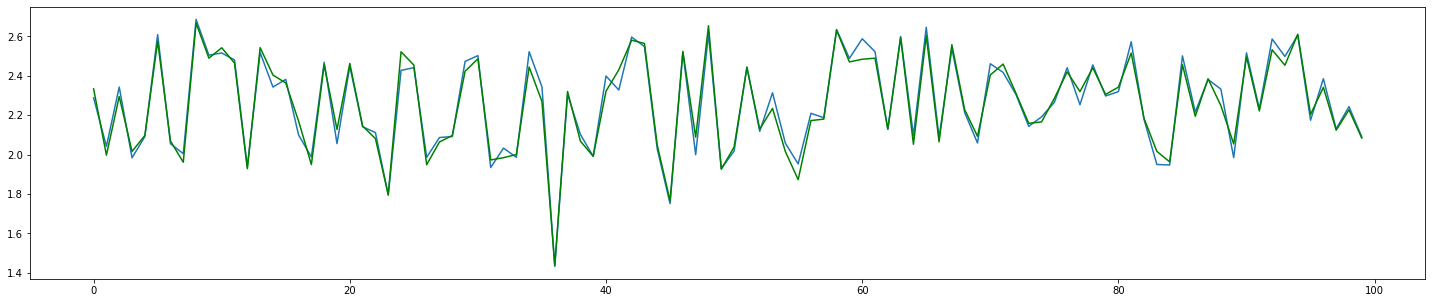

In [7]:
from sklearn.model_selection import train_test_split

# RHOB training Data
train_rhob = train_prep[train_prep.RHOB.notna()]

#Labels and faatures
X_rhob = train_rhob.drop(['RHOB'], axis=1)
Y_rhob = train_rhob['RHOB']

#Imputation
X_rhob_inp = X_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into rhob_train and rhob_validation sets
X_rhob_train, X_rhob_val, Y_rhob_train, Y_rhob_val = train_test_split(X_rhob_inp, Y_rhob, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_rhob_train.shape, X_rhob_val.shape))
#Predicting rhob
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_rhob_train, Y_rhob_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_rhob_val, Y_rhob_val)], verbose=100)

train_pred2 = model1000.predict(X_rhob_train)
val_pred2 = model1000.predict(X_rhob_val)

print('Train error:', max_error(Y_rhob_train, train_pred2))
print('Validation error:', max_error(Y_rhob_val, val_pred2))
#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_rhob_val[25000:25100])
plt.plot(list(range(100)), val_pred2[25000:25100], color='g')

# Filling nan values before predicting rhob
X_train_rhob = train_prep.drop(['RHOB'], axis=1)
X_train_rhob2 = X_train_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_rhob = test_prep.drop(['RHOB'], axis=1)
X_test_rhob2 = X_test_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_rhob = hidden_prep.drop(['RHOB'], axis=1)
X_hidden_rhob2 = X_hidden_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting rhob (COMPLETE DATASETS)
train_prep['RHOB_pred'] = model1000.predict(X_train_rhob2)
test_prep['RHOB_pred'] = model1000.predict(X_test_rhob2)
hidden_prep['RHOB_pred'] = model1000.predict(X_hidden_rhob2)

#Inputing nan values in rhob with rhob_PREDICTED
train_prep['RHOB_COMB'] = train_prep['RHOB']
train_prep['RHOB_COMB'].fillna(train_prep['RHOB_pred'], inplace=True)

test_prep['RHOB_COMB'] = test_prep['RHOB']
test_prep['RHOB_COMB'].fillna(test_prep['RHOB_pred'], inplace=True)

hidden_prep['RHOB_COMB'] = hidden_prep['RHOB']
hidden_prep['RHOB_COMB'].fillna(hidden_prep['RHOB_pred'], inplace=True)

Splitted training data shape is (762753, 23) and validation data shape is (326895, 23)


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:81.93084
[99]	validation_0-rmse:3.92593
Train error: 111.37474060378906
Validation error: 121.93824767953126


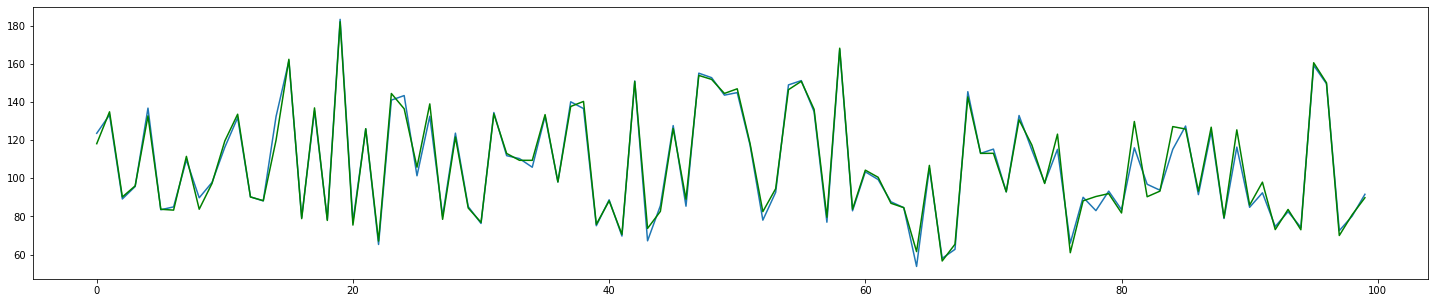

In [8]:
from sklearn.model_selection import train_test_split

# DTC training Data
train_dtc = train_prep[train_prep.DTC.notna()]

#Labels and faatures
X_dtc = train_dtc.drop(['DTC'], axis=1)
Y_dtc = train_dtc['DTC']

#Imputation
X_dtc_inp = X_dtc.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into DTC_train and DTC_validation sets
X_dtc_train, X_dtc_val, Y_dtc_train, Y_dtc_val = train_test_split(X_dtc_inp, Y_dtc, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_dtc_train.shape, X_dtc_val.shape))
#Predicting DTC
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_dtc_train, Y_dtc_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_dtc_val, Y_dtc_val)], verbose=100)

train_pred3 = model1000.predict(X_dtc_train)
val_pred3 = model1000.predict(X_dtc_val)

print('Train error:', max_error(Y_dtc_train, train_pred3))
print('Validation error:', max_error(Y_dtc_val, val_pred3))
#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_dtc_val[25000:25100])
plt.plot(list(range(100)), val_pred3[25000:25100], color='g')

# Filling nan values before predicting DTC
X_train_dtc = train_prep.drop(['DTC'], axis=1)
X_train_dtc2 = X_train_dtc.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_dtc = test_prep.drop(['DTC'], axis=1)
X_test_dtc2 = X_test_dtc.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_dtc = hidden_prep.drop(['DTC'], axis=1)
X_hidden_dtc2 = X_hidden_dtc.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting DTC (COMPLETE DATASETS)
train_prep['DTC_pred'] = model1000.predict(X_train_dtc2)
test_prep['DTC_pred'] = model1000.predict(X_test_dtc2)
hidden_prep['DTC_pred'] = model1000.predict(X_hidden_dtc2)

#Inputing nan values in DTC with DTC_PREDICTED
train_prep['DTC_COMB'] = train_prep['DTC']
train_prep['DTC_COMB'].fillna(train_prep['DTC_pred'], inplace=True)

test_prep['DTC_COMB'] = test_prep['DTC']
test_prep['DTC_COMB'].fillna(test_prep['DTC_pred'], inplace=True)

hidden_prep['DTC_COMB'] = hidden_prep['DTC']
hidden_prep['DTC_COMB'].fillna(hidden_prep['DTC_pred'], inplace=True)

In [9]:
train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 26 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   DEPTH_MD   1170511 non-null  float64
 1   X_LOC      1159736 non-null  float64
 2   Y_LOC      1159736 non-null  float64
 3   Z_LOC      1159736 non-null  float64
 4   CALI       1082634 non-null  float64
 5   RSHA       630650 non-null   float64
 6   RMED       1131518 non-null  float64
 7   RDEP       1159496 non-null  float64
 8   RHOB       1009242 non-null  float64
 9   GR         1170511 non-null  float64
 10  NPHI       765409 non-null   float64
 11  PEF        671692 non-null   float64
 12  DTC        1089648 non-null  float64
 13  SP         864247 non-null   float64
 14  BS         682657 non-null   float64
 15  ROP        535071 non-null   float64
 16  DTS        174613 non-null   float64
 17  DRHO       987857 non-null   float64
 18  DTS_pred   1170511 non-null  float32
 19  

In [10]:
pred_data = pd.concat((train_prep,test_prep,hidden_prep)).reset_index(drop=True) 
cols = ['DTC', 'RHOB', 'DTS', 'NPHI','DTC_pred', 'RHOB_pred', 'DTS_pred', 'NPHI_pred']
pred_data= pred_data.drop(cols, axis=1)


In [11]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429694 entries, 0 to 1429693
Data columns (total 18 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   DEPTH_MD   1429694 non-null  float64
 1   X_LOC      1418849 non-null  float64
 2   Y_LOC      1418849 non-null  float64
 3   Z_LOC      1418849 non-null  float64
 4   CALI       1332729 non-null  float64
 5   RSHA       695430 non-null   float64
 6   RMED       1380297 non-null  float64
 7   RDEP       1418609 non-null  float64
 8   GR         1429694 non-null  float64
 9   PEF        885634 non-null   float64
 10  SP         977599 non-null   float64
 11  BS         824110 non-null   float64
 12  ROP        694537 non-null   float64
 13  DRHO       1211680 non-null  float64
 14  DTS_COMB   1429694 non-null  float64
 15  NPHI_COMB  1429694 non-null  float64
 16  RHOB_COMB  1429694 non-null  float64
 17  DTC_COMB   1429694 non-null  float64
dtypes: float64(18)
memory usage: 196.3 MB


In [12]:
#Inputing missing values by introducing median 
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='median')
miss.fit(pred_data)
pred_imp = miss.fit_transform(pred_data)
pred_imp1=pd.DataFrame(pred_imp, columns=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'GR', 'PEF', 'SP', 'BS', 'ROP', 'DRHO', 'DTS_COMB',
       'NPHI_COMB', 'RHOB_COMB', 'DTC_COMB'])
data_cut=pd.DataFrame(All_data_drop, columns=['GROUP', 'FORMATION','WELL','Lithology'])
miss2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
miss2.fit(data_cut)
data_imp = miss2.fit_transform(data_cut)
data_imp=pd.DataFrame(data_imp, columns=['GROUP', 'FORMATION','WELL','Lithology'])


frames = [pred_imp1,data_imp]
  
pred_imp = pd.concat(frames,axis=1, join='inner')
pred_imp

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,GR,PEF,...,ROP,DRHO,DTS_COMB,NPHI_COMB,RHOB_COMB,DTC_COMB,GROUP,FORMATION,WELL,Lithology
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,1.398049,1.611410,1.798681,80.200851,20.915468,...,34.636410,-0.574928,293.135773,0.649960,1.884186,161.131180,NORDLAND GP.,Utsira Fm.,15/9-13,Shale
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,1.398049,1.618070,1.795641,79.262886,19.383013,...,34.636410,-0.570188,289.720276,0.628829,1.889794,160.603470,NORDLAND GP.,Utsira Fm.,15/9-13,Shale
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,1.398049,1.626459,1.800733,74.821999,22.591518,...,34.779556,-0.574245,288.262939,0.622268,1.896523,160.173615,NORDLAND GP.,Utsira Fm.,15/9-13,Shale
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,1.398049,1.621594,1.801517,72.878922,32.191910,...,39.965164,-0.586315,303.258728,0.629544,1.891913,160.149429,NORDLAND GP.,Utsira Fm.,15/9-13,Shale
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,1.398049,1.602679,1.795299,71.729141,38.495632,...,57.483765,-0.597914,300.852478,0.640826,1.880034,160.128342,NORDLAND GP.,Utsira Fm.,15/9-13,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,2973.2988,536096.06250,6793022.0,-2943.444580,8.276272,1.398049,2.820439,3.158570,90.720284,4.365897,...,15.195305,0.502458,136.911575,0.257952,2.569190,75.260658,BAAT GP.,Etive Fm.,35/9-7,Shale
1429690,2973.4508,536096.06250,6793022.0,-2943.595947,8.267273,1.398049,3.020778,3.332977,87.062027,4.365897,...,15.770223,0.374753,137.583923,0.257952,2.557520,74.868301,BAAT GP.,Etive Fm.,35/9-7,Shale
1429691,2973.6028,536096.06250,6793022.0,-2943.747559,8.250099,1.398049,2.795711,3.044179,86.115921,4.365897,...,16.418465,0.211487,138.310898,0.233165,2.553221,74.848122,BAAT GP.,Etive Fm.,35/9-7,Shale
1429692,2973.7548,536096.06250,6793022.0,-2943.899170,12.515673,1.398049,2.658694,2.847681,89.497131,4.365897,...,17.037945,0.147950,137.592819,0.293388,2.535183,74.964027,BAAT GP.,Etive Fm.,35/9-7,Shale


In [13]:
# pred_imp1=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
#        'GR', 'PEF', 'SP', 'BS', 'ROP', 'DRHO', 'DTS_COMB',
#        'NPHI_COMB', 'RHOB_COMB', 'DTC_COMB'])
# categorical_header=['WELL','GROUP', 'FORMATION','Lithology']
# numeric=All_data_drop.select_dtypes(include=[np.number])
# categorical= All_data_drop.select_dtypes(exclude=[np.number])
# miss = SimpleImputer(missing_values=np.nan, strategy='median')
# miss.fit(numeric)
# numeric_imp = miss.fit_transform(numeric)
# numeric_imp=pd.DataFrame(numeric_imp, columns=numeric_header)
# miss2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# miss2.fit(categorical)
# categorical_imp = miss2.fit_transform(categorical)
# categorical_imp=pd.DataFrame(categorical_imp, columns=categorical_header)
# frames = [numeric_imp,categorical_imp]
  
# result = pd.concat(frames,axis=1, join='inner')
# result

In [14]:
pred_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429694 entries, 0 to 1429693
Data columns (total 22 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   DEPTH_MD   1429694 non-null  float64
 1   X_LOC      1429694 non-null  float64
 2   Y_LOC      1429694 non-null  float64
 3   Z_LOC      1429694 non-null  float64
 4   CALI       1429694 non-null  float64
 5   RSHA       1429694 non-null  float64
 6   RMED       1429694 non-null  float64
 7   RDEP       1429694 non-null  float64
 8   GR         1429694 non-null  float64
 9   PEF        1429694 non-null  float64
 10  SP         1429694 non-null  float64
 11  BS         1429694 non-null  float64
 12  ROP        1429694 non-null  float64
 13  DRHO       1429694 non-null  float64
 14  DTS_COMB   1429694 non-null  float64
 15  NPHI_COMB  1429694 non-null  float64
 16  RHOB_COMB  1429694 non-null  float64
 17  DTC_COMB   1429694 non-null  float64
 18  GROUP      1429694 non-null  object 
 19  

In [15]:
All_data_drop

# encoding categorical variables
pred_imp['GROUP_encoded'] = pred_imp['GROUP'].astype('category')
pred_imp['GROUP_encoded'] = pred_imp['GROUP_encoded'].cat.codes

pred_imp['FORMATION_encoded'] = pred_imp['FORMATION'].astype('category')
pred_imp['FORMATION_encoded'] = pred_imp['FORMATION_encoded'].cat.codes

pred_imp['WELL_encoded'] = pred_imp['WELL'].astype('category')
pred_imp['WELL_encoded'] = pred_imp['WELL_encoded'].cat.codes

pred_imp['Lithology_encoded'] = pred_imp['Lithology'].astype('category')
pred_imp['Lithology_encoded'] = pred_imp['Lithology_encoded'].cat.codes

pred_imp = pred_imp.drop(['GROUP', 'FORMATION','WELL','Lithology'], axis=1)

In [16]:
pred_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429694 entries, 0 to 1429693
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DEPTH_MD           1429694 non-null  float64
 1   X_LOC              1429694 non-null  float64
 2   Y_LOC              1429694 non-null  float64
 3   Z_LOC              1429694 non-null  float64
 4   CALI               1429694 non-null  float64
 5   RSHA               1429694 non-null  float64
 6   RMED               1429694 non-null  float64
 7   RDEP               1429694 non-null  float64
 8   GR                 1429694 non-null  float64
 9   PEF                1429694 non-null  float64
 10  SP                 1429694 non-null  float64
 11  BS                 1429694 non-null  float64
 12  ROP                1429694 non-null  float64
 13  DRHO               1429694 non-null  float64
 14  DTS_COMB           1429694 non-null  float64
 15  NPHI_COMB          1429694 non-n

In [17]:
train_imp = pred_imp[:train_len].copy()
test_imp = pred_imp[train_len:(train_len+test_len)].copy()
hidden_imp = pred_imp[(train_len+test_len):].copy()

print(train_imp.shape)
print(test_imp.shape)
print(hidden_imp.shape)

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
x_header=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'GR', 'PEF', 'SP', 'BS', 'ROP', 'DRHO', 'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded','DTS_COMB',
       'NPHI_COMB', 'RHOB_COMB', 'DTC_COMB']
y_header=['Lithology_encoded']
x_train = train_imp[x_header]
y_train = train_imp[y_header]
x_test = test_imp[x_header]
y_test = test_imp[y_header]
x_hidden = hidden_imp[x_header]
y_hidden = hidden_imp[y_header]

##Min-Max scaler 
scaler = MinMaxScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_hidden_scaled = x_hidden.copy()

x_train_scaled.iloc[:,:18] = scaler.fit_transform(x_train_scaled.iloc[:,:18])
x_test_scaled.iloc[:,:18] = scaler.transform(x_test_scaled.iloc[:,:18])
x_hidden_scaled.iloc[:,:18] = scaler.transform(x_hidden_scaled.iloc[:,:18])



(1170511, 22)
(136786, 22)
(122397, 22)


In [18]:
#Supervised Algorithms
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsRegressor
from pprint import pprint
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
#Comparing base models accuracies by using k-fold cross validation - 10 folds

from sklearn.model_selection import cross_val_score

new_train = pd.concat((x_train_scaled, pd.DataFrame(y_train, columns=["Lithology_encoded"])), axis=1)

#Randomly sampling data
sampled_train = new_train.sample(n=100000, random_state=0)


#Spliting training data
x_train_sam = sampled_train.drop(["Lithology_encoded"], axis=1)
y_train_sam = sampled_train["Lithology_encoded"]



In [19]:
estimator = LogisticRegression(C=1e-3, solver='saga', max_iter=4000)
score = cross_val_score(estimator, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score

0.5045502921369109

In [20]:
estimator1 = DecisionTreeClassifier()
score = cross_val_score(estimator1, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score

0.8645379661687382

In [21]:
estimator2 = RandomForestClassifier()
score = cross_val_score(estimator2, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score

0.9126462738631023

In [22]:
estimator3 = XGBClassifier()
score3 = cross_val_score(estimator3, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score3

C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:01:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:04:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:08:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:10:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:13:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:15:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:17:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:20:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:22:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:24:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8962835010091752

In [23]:
estimator4 = GradientBoostingClassifier()
score4 = cross_val_score(estimator4, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score4


0.8337727414231496

In [24]:
from sklearn.neighbors import KNeighborsClassifier
estimator5 =KNeighborsClassifier()
score5 = cross_val_score(estimator5, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score5


0.7480905268142338

In [25]:
from sklearn.neighbors import KNeighborsClassifier
estimator6 =SVC()
score6 = cross_val_score(estimator6, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score6


0.48750912249379164

In [26]:
from catboost import CatBoostClassifier
estimator7 =CatBoostClassifier()
score7 = cross_val_score(estimator7, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score7


Learning rate set to 0.099538
0:	learn: 1.9567621	total: 746ms	remaining: 12m 25s
1:	learn: 1.7175258	total: 1.24s	remaining: 10m 19s
2:	learn: 1.5557498	total: 1.7s	remaining: 9m 23s
3:	learn: 1.4335429	total: 2.19s	remaining: 9m 4s
4:	learn: 1.3350095	total: 2.66s	remaining: 8m 49s
5:	learn: 1.2517606	total: 3.12s	remaining: 8m 37s
6:	learn: 1.1859508	total: 3.61s	remaining: 8m 31s
7:	learn: 1.1207220	total: 4.11s	remaining: 8m 30s
8:	learn: 1.0720693	total: 4.62s	remaining: 8m 28s
9:	learn: 1.0277777	total: 5.09s	remaining: 8m 23s
10:	learn: 0.9893843	total: 5.56s	remaining: 8m 20s
11:	learn: 0.9561571	total: 6.08s	remaining: 8m 21s
12:	learn: 0.9278446	total: 6.58s	remaining: 8m 19s
13:	learn: 0.8988835	total: 7.05s	remaining: 8m 16s
14:	learn: 0.8762021	total: 7.51s	remaining: 8m 13s
15:	learn: 0.8545949	total: 7.99s	remaining: 8m 11s
16:	learn: 0.8332298	total: 8.51s	remaining: 8m 11s
17:	learn: 0.8135583	total: 9.05s	remaining: 8m 14s
18:	learn: 0.7974404	total: 9.6s	remaining: 

157:	learn: 0.4309688	total: 1m 14s	remaining: 6m 39s
158:	learn: 0.4302790	total: 1m 15s	remaining: 6m 38s
159:	learn: 0.4296746	total: 1m 15s	remaining: 6m 37s
160:	learn: 0.4292277	total: 1m 16s	remaining: 6m 37s
161:	learn: 0.4285500	total: 1m 16s	remaining: 6m 36s
162:	learn: 0.4281202	total: 1m 17s	remaining: 6m 36s
163:	learn: 0.4276450	total: 1m 17s	remaining: 6m 35s
164:	learn: 0.4268772	total: 1m 18s	remaining: 6m 35s
165:	learn: 0.4262548	total: 1m 18s	remaining: 6m 34s
166:	learn: 0.4256157	total: 1m 18s	remaining: 6m 33s
167:	learn: 0.4248364	total: 1m 19s	remaining: 6m 33s
168:	learn: 0.4242311	total: 1m 19s	remaining: 6m 32s
169:	learn: 0.4236564	total: 1m 20s	remaining: 6m 31s
170:	learn: 0.4226717	total: 1m 20s	remaining: 6m 31s
171:	learn: 0.4220004	total: 1m 21s	remaining: 6m 30s
172:	learn: 0.4209552	total: 1m 21s	remaining: 6m 30s
173:	learn: 0.4203237	total: 1m 22s	remaining: 6m 29s
174:	learn: 0.4197695	total: 1m 22s	remaining: 6m 29s
175:	learn: 0.4194264	total:

310:	learn: 0.3583067	total: 2m 26s	remaining: 5m 25s
311:	learn: 0.3576615	total: 2m 27s	remaining: 5m 24s
312:	learn: 0.3573651	total: 2m 27s	remaining: 5m 24s
313:	learn: 0.3570549	total: 2m 28s	remaining: 5m 24s
314:	learn: 0.3568022	total: 2m 28s	remaining: 5m 23s
315:	learn: 0.3565911	total: 2m 29s	remaining: 5m 22s
316:	learn: 0.3563670	total: 2m 29s	remaining: 5m 21s
317:	learn: 0.3560992	total: 2m 29s	remaining: 5m 20s
318:	learn: 0.3559123	total: 2m 29s	remaining: 5m 20s
319:	learn: 0.3557356	total: 2m 30s	remaining: 5m 19s
320:	learn: 0.3555334	total: 2m 30s	remaining: 5m 18s
321:	learn: 0.3550882	total: 2m 30s	remaining: 5m 17s
322:	learn: 0.3548940	total: 2m 31s	remaining: 5m 16s
323:	learn: 0.3545865	total: 2m 31s	remaining: 5m 16s
324:	learn: 0.3542932	total: 2m 31s	remaining: 5m 15s
325:	learn: 0.3541380	total: 2m 32s	remaining: 5m 14s
326:	learn: 0.3538315	total: 2m 32s	remaining: 5m 13s
327:	learn: 0.3535402	total: 2m 32s	remaining: 5m 12s
328:	learn: 0.3532024	total:

464:	learn: 0.3202414	total: 3m 13s	remaining: 3m 42s
465:	learn: 0.3200712	total: 3m 13s	remaining: 3m 42s
466:	learn: 0.3197974	total: 3m 14s	remaining: 3m 41s
467:	learn: 0.3196215	total: 3m 14s	remaining: 3m 41s
468:	learn: 0.3194073	total: 3m 14s	remaining: 3m 40s
469:	learn: 0.3191932	total: 3m 15s	remaining: 3m 39s
470:	learn: 0.3190826	total: 3m 15s	remaining: 3m 39s
471:	learn: 0.3189263	total: 3m 15s	remaining: 3m 38s
472:	learn: 0.3188131	total: 3m 15s	remaining: 3m 38s
473:	learn: 0.3185957	total: 3m 16s	remaining: 3m 37s
474:	learn: 0.3185058	total: 3m 16s	remaining: 3m 37s
475:	learn: 0.3183641	total: 3m 16s	remaining: 3m 36s
476:	learn: 0.3182781	total: 3m 17s	remaining: 3m 36s
477:	learn: 0.3180935	total: 3m 17s	remaining: 3m 35s
478:	learn: 0.3180207	total: 3m 17s	remaining: 3m 35s
479:	learn: 0.3178964	total: 3m 17s	remaining: 3m 34s
480:	learn: 0.3177667	total: 3m 18s	remaining: 3m 33s
481:	learn: 0.3175762	total: 3m 18s	remaining: 3m 33s
482:	learn: 0.3174147	total:

617:	learn: 0.2939323	total: 4m 2s	remaining: 2m 29s
618:	learn: 0.2938328	total: 4m 2s	remaining: 2m 29s
619:	learn: 0.2937188	total: 4m 3s	remaining: 2m 29s
620:	learn: 0.2935836	total: 4m 3s	remaining: 2m 28s
621:	learn: 0.2934557	total: 4m 3s	remaining: 2m 28s
622:	learn: 0.2932789	total: 4m 4s	remaining: 2m 27s
623:	learn: 0.2931594	total: 4m 4s	remaining: 2m 27s
624:	learn: 0.2930385	total: 4m 4s	remaining: 2m 26s
625:	learn: 0.2929189	total: 4m 5s	remaining: 2m 26s
626:	learn: 0.2926821	total: 4m 5s	remaining: 2m 25s
627:	learn: 0.2925541	total: 4m 5s	remaining: 2m 25s
628:	learn: 0.2924998	total: 4m 6s	remaining: 2m 25s
629:	learn: 0.2923840	total: 4m 6s	remaining: 2m 24s
630:	learn: 0.2922160	total: 4m 6s	remaining: 2m 24s
631:	learn: 0.2921047	total: 4m 6s	remaining: 2m 23s
632:	learn: 0.2919560	total: 4m 7s	remaining: 2m 23s
633:	learn: 0.2918550	total: 4m 7s	remaining: 2m 22s
634:	learn: 0.2917906	total: 4m 7s	remaining: 2m 22s
635:	learn: 0.2916750	total: 4m 8s	remaining: 

770:	learn: 0.2754956	total: 4m 52s	remaining: 1m 26s
771:	learn: 0.2753488	total: 4m 53s	remaining: 1m 26s
772:	learn: 0.2752785	total: 4m 53s	remaining: 1m 26s
773:	learn: 0.2751143	total: 4m 53s	remaining: 1m 25s
774:	learn: 0.2749719	total: 4m 54s	remaining: 1m 25s
775:	learn: 0.2748494	total: 4m 54s	remaining: 1m 24s
776:	learn: 0.2747759	total: 4m 54s	remaining: 1m 24s
777:	learn: 0.2747205	total: 4m 55s	remaining: 1m 24s
778:	learn: 0.2745438	total: 4m 55s	remaining: 1m 23s
779:	learn: 0.2744299	total: 4m 55s	remaining: 1m 23s
780:	learn: 0.2743398	total: 4m 56s	remaining: 1m 23s
781:	learn: 0.2742142	total: 4m 56s	remaining: 1m 22s
782:	learn: 0.2741606	total: 4m 56s	remaining: 1m 22s
783:	learn: 0.2740984	total: 4m 56s	remaining: 1m 21s
784:	learn: 0.2740408	total: 4m 57s	remaining: 1m 21s
785:	learn: 0.2738732	total: 4m 57s	remaining: 1m 21s
786:	learn: 0.2737954	total: 4m 57s	remaining: 1m 20s
787:	learn: 0.2735475	total: 4m 58s	remaining: 1m 20s
788:	learn: 0.2734524	total:

925:	learn: 0.2596511	total: 5m 42s	remaining: 27.4s
926:	learn: 0.2596004	total: 5m 42s	remaining: 27s
927:	learn: 0.2594895	total: 5m 43s	remaining: 26.6s
928:	learn: 0.2594427	total: 5m 43s	remaining: 26.3s
929:	learn: 0.2593333	total: 5m 43s	remaining: 25.9s
930:	learn: 0.2592050	total: 5m 44s	remaining: 25.5s
931:	learn: 0.2590762	total: 5m 44s	remaining: 25.1s
932:	learn: 0.2590210	total: 5m 44s	remaining: 24.7s
933:	learn: 0.2589869	total: 5m 44s	remaining: 24.4s
934:	learn: 0.2589220	total: 5m 45s	remaining: 24s
935:	learn: 0.2587547	total: 5m 45s	remaining: 23.6s
936:	learn: 0.2586521	total: 5m 45s	remaining: 23.2s
937:	learn: 0.2585677	total: 5m 46s	remaining: 22.9s
938:	learn: 0.2584529	total: 5m 46s	remaining: 22.5s
939:	learn: 0.2583888	total: 5m 46s	remaining: 22.1s
940:	learn: 0.2583308	total: 5m 46s	remaining: 21.8s
941:	learn: 0.2582378	total: 5m 47s	remaining: 21.4s
942:	learn: 0.2581549	total: 5m 47s	remaining: 21s
943:	learn: 0.2580893	total: 5m 47s	remaining: 20.6s

82:	learn: 0.5159399	total: 25s	remaining: 4m 35s
83:	learn: 0.5141481	total: 25.3s	remaining: 4m 35s
84:	learn: 0.5123644	total: 25.5s	remaining: 4m 34s
85:	learn: 0.5110587	total: 25.9s	remaining: 4m 34s
86:	learn: 0.5093706	total: 26.3s	remaining: 4m 36s
87:	learn: 0.5073108	total: 26.7s	remaining: 4m 36s
88:	learn: 0.5061777	total: 27.2s	remaining: 4m 37s
89:	learn: 0.5047346	total: 27.5s	remaining: 4m 38s
90:	learn: 0.5035364	total: 27.8s	remaining: 4m 37s
91:	learn: 0.5019318	total: 28.2s	remaining: 4m 37s
92:	learn: 0.5009913	total: 28.5s	remaining: 4m 37s
93:	learn: 0.5002151	total: 28.8s	remaining: 4m 37s
94:	learn: 0.4989443	total: 29.1s	remaining: 4m 36s
95:	learn: 0.4976140	total: 29.4s	remaining: 4m 36s
96:	learn: 0.4960926	total: 29.7s	remaining: 4m 36s
97:	learn: 0.4945338	total: 30s	remaining: 4m 36s
98:	learn: 0.4931608	total: 30.4s	remaining: 4m 36s
99:	learn: 0.4917521	total: 30.7s	remaining: 4m 36s
100:	learn: 0.4899887	total: 31s	remaining: 4m 35s
101:	learn: 0.488

239:	learn: 0.3849943	total: 1m 16s	remaining: 4m 1s
240:	learn: 0.3844984	total: 1m 16s	remaining: 4m 1s
241:	learn: 0.3841586	total: 1m 17s	remaining: 4m 1s
242:	learn: 0.3835775	total: 1m 17s	remaining: 4m 1s
243:	learn: 0.3832079	total: 1m 18s	remaining: 4m 1s
244:	learn: 0.3826083	total: 1m 18s	remaining: 4m 1s
245:	learn: 0.3819900	total: 1m 18s	remaining: 4m 1s
246:	learn: 0.3814775	total: 1m 19s	remaining: 4m 1s
247:	learn: 0.3813006	total: 1m 19s	remaining: 4m
248:	learn: 0.3810082	total: 1m 19s	remaining: 4m
249:	learn: 0.3806540	total: 1m 20s	remaining: 4m
250:	learn: 0.3800830	total: 1m 20s	remaining: 4m 1s
251:	learn: 0.3798379	total: 1m 21s	remaining: 4m 1s
252:	learn: 0.3794983	total: 1m 21s	remaining: 4m 1s
253:	learn: 0.3790628	total: 1m 22s	remaining: 4m 1s
254:	learn: 0.3784851	total: 1m 22s	remaining: 4m 2s
255:	learn: 0.3782838	total: 1m 23s	remaining: 4m 2s
256:	learn: 0.3778869	total: 1m 23s	remaining: 4m 2s
257:	learn: 0.3773667	total: 1m 24s	remaining: 4m 2s
25

393:	learn: 0.3367232	total: 2m 15s	remaining: 3m 28s
394:	learn: 0.3362619	total: 2m 16s	remaining: 3m 28s
395:	learn: 0.3360874	total: 2m 16s	remaining: 3m 28s
396:	learn: 0.3355902	total: 2m 16s	remaining: 3m 27s
397:	learn: 0.3354082	total: 2m 17s	remaining: 3m 27s
398:	learn: 0.3352187	total: 2m 17s	remaining: 3m 26s
399:	learn: 0.3350331	total: 2m 17s	remaining: 3m 26s
400:	learn: 0.3346720	total: 2m 17s	remaining: 3m 25s
401:	learn: 0.3345167	total: 2m 18s	remaining: 3m 25s
402:	learn: 0.3343071	total: 2m 18s	remaining: 3m 25s
403:	learn: 0.3338240	total: 2m 18s	remaining: 3m 24s
404:	learn: 0.3335013	total: 2m 19s	remaining: 3m 24s
405:	learn: 0.3332675	total: 2m 19s	remaining: 3m 24s
406:	learn: 0.3330183	total: 2m 19s	remaining: 3m 23s
407:	learn: 0.3329179	total: 2m 20s	remaining: 3m 23s
408:	learn: 0.3326757	total: 2m 20s	remaining: 3m 22s
409:	learn: 0.3325836	total: 2m 20s	remaining: 3m 22s
410:	learn: 0.3323574	total: 2m 20s	remaining: 3m 22s
411:	learn: 0.3321247	total:

546:	learn: 0.3057057	total: 3m 1s	remaining: 2m 30s
547:	learn: 0.3053515	total: 3m 1s	remaining: 2m 29s
548:	learn: 0.3052497	total: 3m 1s	remaining: 2m 29s
549:	learn: 0.3049965	total: 3m 2s	remaining: 2m 29s
550:	learn: 0.3047660	total: 3m 2s	remaining: 2m 28s
551:	learn: 0.3045690	total: 3m 2s	remaining: 2m 28s
552:	learn: 0.3044004	total: 3m 3s	remaining: 2m 28s
553:	learn: 0.3042514	total: 3m 3s	remaining: 2m 27s
554:	learn: 0.3041624	total: 3m 3s	remaining: 2m 27s
555:	learn: 0.3040353	total: 3m 4s	remaining: 2m 26s
556:	learn: 0.3038921	total: 3m 4s	remaining: 2m 26s
557:	learn: 0.3037927	total: 3m 4s	remaining: 2m 26s
558:	learn: 0.3036781	total: 3m 5s	remaining: 2m 26s
559:	learn: 0.3036003	total: 3m 5s	remaining: 2m 25s
560:	learn: 0.3034990	total: 3m 5s	remaining: 2m 25s
561:	learn: 0.3032790	total: 3m 6s	remaining: 2m 25s
562:	learn: 0.3029132	total: 3m 6s	remaining: 2m 24s
563:	learn: 0.3027479	total: 3m 6s	remaining: 2m 24s
564:	learn: 0.3025132	total: 3m 7s	remaining: 

699:	learn: 0.2854597	total: 3m 50s	remaining: 1m 38s
700:	learn: 0.2853970	total: 3m 51s	remaining: 1m 38s
701:	learn: 0.2852415	total: 3m 51s	remaining: 1m 38s
702:	learn: 0.2849292	total: 3m 51s	remaining: 1m 37s
703:	learn: 0.2847818	total: 3m 52s	remaining: 1m 37s
704:	learn: 0.2846747	total: 3m 52s	remaining: 1m 37s
705:	learn: 0.2845307	total: 3m 52s	remaining: 1m 36s
706:	learn: 0.2844794	total: 3m 52s	remaining: 1m 36s
707:	learn: 0.2843344	total: 3m 53s	remaining: 1m 36s
708:	learn: 0.2842625	total: 3m 53s	remaining: 1m 35s
709:	learn: 0.2841261	total: 3m 53s	remaining: 1m 35s
710:	learn: 0.2839793	total: 3m 54s	remaining: 1m 35s
711:	learn: 0.2838818	total: 3m 54s	remaining: 1m 34s
712:	learn: 0.2837162	total: 3m 54s	remaining: 1m 34s
713:	learn: 0.2834966	total: 3m 55s	remaining: 1m 34s
714:	learn: 0.2833629	total: 3m 55s	remaining: 1m 33s
715:	learn: 0.2832588	total: 3m 55s	remaining: 1m 33s
716:	learn: 0.2830970	total: 3m 56s	remaining: 1m 33s
717:	learn: 0.2830251	total:

853:	learn: 0.2685301	total: 4m 41s	remaining: 48.2s
854:	learn: 0.2684431	total: 4m 42s	remaining: 47.8s
855:	learn: 0.2683956	total: 4m 42s	remaining: 47.5s
856:	learn: 0.2681803	total: 4m 42s	remaining: 47.2s
857:	learn: 0.2679926	total: 4m 42s	remaining: 46.8s
858:	learn: 0.2679343	total: 4m 43s	remaining: 46.5s
859:	learn: 0.2678234	total: 4m 43s	remaining: 46.2s
860:	learn: 0.2676883	total: 4m 43s	remaining: 45.8s
861:	learn: 0.2676135	total: 4m 44s	remaining: 45.5s
862:	learn: 0.2674929	total: 4m 44s	remaining: 45.1s
863:	learn: 0.2673929	total: 4m 44s	remaining: 44.8s
864:	learn: 0.2673189	total: 4m 44s	remaining: 44.5s
865:	learn: 0.2671668	total: 4m 45s	remaining: 44.1s
866:	learn: 0.2670628	total: 4m 45s	remaining: 43.8s
867:	learn: 0.2670261	total: 4m 45s	remaining: 43.5s
868:	learn: 0.2669594	total: 4m 46s	remaining: 43.1s
869:	learn: 0.2669114	total: 4m 46s	remaining: 42.8s
870:	learn: 0.2667850	total: 4m 46s	remaining: 42.5s
871:	learn: 0.2666553	total: 4m 46s	remaining:

9:	learn: 1.0318024	total: 2.94s	remaining: 4m 50s
10:	learn: 0.9959933	total: 3.22s	remaining: 4m 49s
11:	learn: 0.9614752	total: 3.51s	remaining: 4m 48s
12:	learn: 0.9318383	total: 3.78s	remaining: 4m 46s
13:	learn: 0.9031323	total: 4.08s	remaining: 4m 47s
14:	learn: 0.8807668	total: 4.38s	remaining: 4m 47s
15:	learn: 0.8568828	total: 4.69s	remaining: 4m 48s
16:	learn: 0.8397677	total: 5.07s	remaining: 4m 53s
17:	learn: 0.8205024	total: 5.37s	remaining: 4m 53s
18:	learn: 0.8037812	total: 5.65s	remaining: 4m 51s
19:	learn: 0.7892965	total: 5.93s	remaining: 4m 50s
20:	learn: 0.7749411	total: 6.22s	remaining: 4m 49s
21:	learn: 0.7617066	total: 6.5s	remaining: 4m 49s
22:	learn: 0.7488130	total: 6.81s	remaining: 4m 49s
23:	learn: 0.7355911	total: 7.09s	remaining: 4m 48s
24:	learn: 0.7250682	total: 7.38s	remaining: 4m 47s
25:	learn: 0.7146147	total: 7.64s	remaining: 4m 46s
26:	learn: 0.7060821	total: 7.92s	remaining: 4m 45s
27:	learn: 0.6973855	total: 8.22s	remaining: 4m 45s
28:	learn: 0.6

167:	learn: 0.4244196	total: 48s	remaining: 3m 57s
168:	learn: 0.4238616	total: 48.3s	remaining: 3m 57s
169:	learn: 0.4234955	total: 48.6s	remaining: 3m 57s
170:	learn: 0.4227929	total: 48.9s	remaining: 3m 57s
171:	learn: 0.4218054	total: 49.2s	remaining: 3m 56s
172:	learn: 0.4213562	total: 49.5s	remaining: 3m 56s
173:	learn: 0.4206802	total: 49.8s	remaining: 3m 56s
174:	learn: 0.4198501	total: 50.3s	remaining: 3m 57s
175:	learn: 0.4193882	total: 50.7s	remaining: 3m 57s
176:	learn: 0.4188840	total: 51s	remaining: 3m 57s
177:	learn: 0.4184523	total: 51.3s	remaining: 3m 56s
178:	learn: 0.4179204	total: 51.6s	remaining: 3m 56s
179:	learn: 0.4174386	total: 51.9s	remaining: 3m 56s
180:	learn: 0.4166846	total: 52.1s	remaining: 3m 55s
181:	learn: 0.4158463	total: 52.4s	remaining: 3m 55s
182:	learn: 0.4149158	total: 52.7s	remaining: 3m 55s
183:	learn: 0.4141903	total: 53s	remaining: 3m 55s
184:	learn: 0.4135993	total: 53.3s	remaining: 3m 54s
185:	learn: 0.4127311	total: 53.5s	remaining: 3m 54s

321:	learn: 0.3561691	total: 1m 31s	remaining: 3m 13s
322:	learn: 0.3559850	total: 1m 32s	remaining: 3m 12s
323:	learn: 0.3556495	total: 1m 32s	remaining: 3m 12s
324:	learn: 0.3553031	total: 1m 32s	remaining: 3m 12s
325:	learn: 0.3548892	total: 1m 32s	remaining: 3m 12s
326:	learn: 0.3545194	total: 1m 33s	remaining: 3m 11s
327:	learn: 0.3542079	total: 1m 33s	remaining: 3m 11s
328:	learn: 0.3538606	total: 1m 33s	remaining: 3m 11s
329:	learn: 0.3534012	total: 1m 34s	remaining: 3m 10s
330:	learn: 0.3529535	total: 1m 34s	remaining: 3m 10s
331:	learn: 0.3526909	total: 1m 34s	remaining: 3m 10s
332:	learn: 0.3523882	total: 1m 34s	remaining: 3m 10s
333:	learn: 0.3517968	total: 1m 35s	remaining: 3m 9s
334:	learn: 0.3514381	total: 1m 35s	remaining: 3m 9s
335:	learn: 0.3511891	total: 1m 35s	remaining: 3m 9s
336:	learn: 0.3509683	total: 1m 36s	remaining: 3m 8s
337:	learn: 0.3508621	total: 1m 36s	remaining: 3m 8s
338:	learn: 0.3506270	total: 1m 36s	remaining: 3m 8s
339:	learn: 0.3502748	total: 1m 36

475:	learn: 0.3189914	total: 2m 11s	remaining: 2m 25s
476:	learn: 0.3187668	total: 2m 12s	remaining: 2m 24s
477:	learn: 0.3186778	total: 2m 12s	remaining: 2m 24s
478:	learn: 0.3185429	total: 2m 12s	remaining: 2m 24s
479:	learn: 0.3184213	total: 2m 12s	remaining: 2m 24s
480:	learn: 0.3183081	total: 2m 13s	remaining: 2m 23s
481:	learn: 0.3179275	total: 2m 13s	remaining: 2m 23s
482:	learn: 0.3178241	total: 2m 13s	remaining: 2m 23s
483:	learn: 0.3176750	total: 2m 13s	remaining: 2m 22s
484:	learn: 0.3175000	total: 2m 14s	remaining: 2m 22s
485:	learn: 0.3173074	total: 2m 14s	remaining: 2m 22s
486:	learn: 0.3170563	total: 2m 14s	remaining: 2m 21s
487:	learn: 0.3168764	total: 2m 14s	remaining: 2m 21s
488:	learn: 0.3167034	total: 2m 15s	remaining: 2m 21s
489:	learn: 0.3164921	total: 2m 15s	remaining: 2m 20s
490:	learn: 0.3162373	total: 2m 15s	remaining: 2m 20s
491:	learn: 0.3161584	total: 2m 15s	remaining: 2m 20s
492:	learn: 0.3160009	total: 2m 16s	remaining: 2m 19s
493:	learn: 0.3158984	total:

628:	learn: 0.2928574	total: 2m 48s	remaining: 1m 39s
629:	learn: 0.2927758	total: 2m 49s	remaining: 1m 39s
630:	learn: 0.2925881	total: 2m 49s	remaining: 1m 39s
631:	learn: 0.2925061	total: 2m 49s	remaining: 1m 38s
632:	learn: 0.2923624	total: 2m 49s	remaining: 1m 38s
633:	learn: 0.2921984	total: 2m 50s	remaining: 1m 38s
634:	learn: 0.2921206	total: 2m 50s	remaining: 1m 37s
635:	learn: 0.2919945	total: 2m 50s	remaining: 1m 37s
636:	learn: 0.2918596	total: 2m 50s	remaining: 1m 37s
637:	learn: 0.2916767	total: 2m 51s	remaining: 1m 37s
638:	learn: 0.2915920	total: 2m 51s	remaining: 1m 36s
639:	learn: 0.2914880	total: 2m 51s	remaining: 1m 36s
640:	learn: 0.2913465	total: 2m 51s	remaining: 1m 36s
641:	learn: 0.2911092	total: 2m 52s	remaining: 1m 35s
642:	learn: 0.2909173	total: 2m 52s	remaining: 1m 35s
643:	learn: 0.2907621	total: 2m 52s	remaining: 1m 35s
644:	learn: 0.2906817	total: 2m 52s	remaining: 1m 35s
645:	learn: 0.2906035	total: 2m 53s	remaining: 1m 34s
646:	learn: 0.2905344	total:

782:	learn: 0.2738318	total: 3m 26s	remaining: 57.1s
783:	learn: 0.2737548	total: 3m 26s	remaining: 56.9s
784:	learn: 0.2736669	total: 3m 26s	remaining: 56.6s
785:	learn: 0.2735306	total: 3m 26s	remaining: 56.3s
786:	learn: 0.2733848	total: 3m 27s	remaining: 56.1s
787:	learn: 0.2733270	total: 3m 27s	remaining: 55.8s
788:	learn: 0.2731939	total: 3m 27s	remaining: 55.5s
789:	learn: 0.2730946	total: 3m 27s	remaining: 55.3s
790:	learn: 0.2729537	total: 3m 28s	remaining: 55s
791:	learn: 0.2728095	total: 3m 28s	remaining: 54.7s
792:	learn: 0.2727515	total: 3m 28s	remaining: 54.5s
793:	learn: 0.2726145	total: 3m 28s	remaining: 54.2s
794:	learn: 0.2725253	total: 3m 29s	remaining: 53.9s
795:	learn: 0.2722805	total: 3m 29s	remaining: 53.6s
796:	learn: 0.2722159	total: 3m 29s	remaining: 53.4s
797:	learn: 0.2721118	total: 3m 29s	remaining: 53.1s
798:	learn: 0.2720542	total: 3m 30s	remaining: 52.8s
799:	learn: 0.2719392	total: 3m 30s	remaining: 52.6s
800:	learn: 0.2718891	total: 3m 30s	remaining: 5

938:	learn: 0.2588020	total: 4m 3s	remaining: 15.8s
939:	learn: 0.2587033	total: 4m 4s	remaining: 15.6s
940:	learn: 0.2585774	total: 4m 4s	remaining: 15.3s
941:	learn: 0.2584364	total: 4m 4s	remaining: 15.1s
942:	learn: 0.2583375	total: 4m 4s	remaining: 14.8s
943:	learn: 0.2581888	total: 4m 5s	remaining: 14.5s
944:	learn: 0.2581154	total: 4m 5s	remaining: 14.3s
945:	learn: 0.2580451	total: 4m 5s	remaining: 14s
946:	learn: 0.2579412	total: 4m 5s	remaining: 13.8s
947:	learn: 0.2578830	total: 4m 6s	remaining: 13.5s
948:	learn: 0.2578217	total: 4m 6s	remaining: 13.2s
949:	learn: 0.2577838	total: 4m 6s	remaining: 13s
950:	learn: 0.2577083	total: 4m 6s	remaining: 12.7s
951:	learn: 0.2576236	total: 4m 7s	remaining: 12.5s
952:	learn: 0.2574934	total: 4m 7s	remaining: 12.2s
953:	learn: 0.2573501	total: 4m 7s	remaining: 11.9s
954:	learn: 0.2572752	total: 4m 7s	remaining: 11.7s
955:	learn: 0.2571390	total: 4m 8s	remaining: 11.4s
956:	learn: 0.2570429	total: 4m 8s	remaining: 11.2s
957:	learn: 0.25

96:	learn: 0.4923354	total: 23.6s	remaining: 3m 39s
97:	learn: 0.4912500	total: 23.8s	remaining: 3m 39s
98:	learn: 0.4897530	total: 24.1s	remaining: 3m 38s
99:	learn: 0.4886496	total: 24.3s	remaining: 3m 38s
100:	learn: 0.4868854	total: 24.5s	remaining: 3m 38s
101:	learn: 0.4854531	total: 24.8s	remaining: 3m 38s
102:	learn: 0.4846350	total: 25s	remaining: 3m 37s
103:	learn: 0.4832060	total: 25.3s	remaining: 3m 37s
104:	learn: 0.4822634	total: 25.5s	remaining: 3m 37s
105:	learn: 0.4808207	total: 25.8s	remaining: 3m 37s
106:	learn: 0.4798528	total: 26s	remaining: 3m 37s
107:	learn: 0.4784304	total: 26.2s	remaining: 3m 36s
108:	learn: 0.4777446	total: 26.5s	remaining: 3m 36s
109:	learn: 0.4759316	total: 26.7s	remaining: 3m 36s
110:	learn: 0.4750182	total: 27s	remaining: 3m 36s
111:	learn: 0.4742364	total: 27.2s	remaining: 3m 36s
112:	learn: 0.4731129	total: 27.5s	remaining: 3m 35s
113:	learn: 0.4717756	total: 27.7s	remaining: 3m 35s
114:	learn: 0.4712077	total: 28s	remaining: 3m 35s
115:	

253:	learn: 0.3783798	total: 1m 1s	remaining: 3m
254:	learn: 0.3777656	total: 1m 1s	remaining: 3m
255:	learn: 0.3772838	total: 1m 2s	remaining: 3m
256:	learn: 0.3765493	total: 1m 2s	remaining: 3m
257:	learn: 0.3760908	total: 1m 2s	remaining: 3m
258:	learn: 0.3757775	total: 1m 2s	remaining: 2m 59s
259:	learn: 0.3754616	total: 1m 3s	remaining: 2m 59s
260:	learn: 0.3749458	total: 1m 3s	remaining: 2m 59s
261:	learn: 0.3743127	total: 1m 3s	remaining: 2m 59s
262:	learn: 0.3739040	total: 1m 3s	remaining: 2m 59s
263:	learn: 0.3732552	total: 1m 4s	remaining: 2m 58s
264:	learn: 0.3731093	total: 1m 4s	remaining: 2m 58s
265:	learn: 0.3724163	total: 1m 4s	remaining: 2m 58s
266:	learn: 0.3719702	total: 1m 4s	remaining: 2m 58s
267:	learn: 0.3716488	total: 1m 5s	remaining: 2m 57s
268:	learn: 0.3711570	total: 1m 5s	remaining: 2m 57s
269:	learn: 0.3707144	total: 1m 5s	remaining: 2m 57s
270:	learn: 0.3704577	total: 1m 5s	remaining: 2m 57s
271:	learn: 0.3700245	total: 1m 6s	remaining: 2m 56s
272:	learn: 0

406:	learn: 0.3313017	total: 1m 38s	remaining: 2m 23s
407:	learn: 0.3312300	total: 1m 38s	remaining: 2m 23s
408:	learn: 0.3309006	total: 1m 39s	remaining: 2m 23s
409:	learn: 0.3308165	total: 1m 39s	remaining: 2m 22s
410:	learn: 0.3305206	total: 1m 39s	remaining: 2m 22s
411:	learn: 0.3300561	total: 1m 39s	remaining: 2m 22s
412:	learn: 0.3299056	total: 1m 39s	remaining: 2m 22s
413:	learn: 0.3296329	total: 1m 40s	remaining: 2m 21s
414:	learn: 0.3294522	total: 1m 40s	remaining: 2m 21s
415:	learn: 0.3292732	total: 1m 40s	remaining: 2m 21s
416:	learn: 0.3289641	total: 1m 40s	remaining: 2m 21s
417:	learn: 0.3287944	total: 1m 41s	remaining: 2m 20s
418:	learn: 0.3285611	total: 1m 41s	remaining: 2m 20s
419:	learn: 0.3283033	total: 1m 41s	remaining: 2m 20s
420:	learn: 0.3281938	total: 1m 41s	remaining: 2m 20s
421:	learn: 0.3280070	total: 1m 42s	remaining: 2m 19s
422:	learn: 0.3277766	total: 1m 42s	remaining: 2m 19s
423:	learn: 0.3273777	total: 1m 42s	remaining: 2m 19s
424:	learn: 0.3270629	total:

560:	learn: 0.3022224	total: 2m 16s	remaining: 1m 46s
561:	learn: 0.3020947	total: 2m 16s	remaining: 1m 46s
562:	learn: 0.3019627	total: 2m 16s	remaining: 1m 46s
563:	learn: 0.3018957	total: 2m 16s	remaining: 1m 45s
564:	learn: 0.3017733	total: 2m 17s	remaining: 1m 45s
565:	learn: 0.3013699	total: 2m 17s	remaining: 1m 45s
566:	learn: 0.3012750	total: 2m 17s	remaining: 1m 45s
567:	learn: 0.3011845	total: 2m 17s	remaining: 1m 44s
568:	learn: 0.3009783	total: 2m 18s	remaining: 1m 44s
569:	learn: 0.3008279	total: 2m 18s	remaining: 1m 44s
570:	learn: 0.3005902	total: 2m 18s	remaining: 1m 44s
571:	learn: 0.3004357	total: 2m 18s	remaining: 1m 43s
572:	learn: 0.3002437	total: 2m 19s	remaining: 1m 43s
573:	learn: 0.3001762	total: 2m 19s	remaining: 1m 43s
574:	learn: 0.3000753	total: 2m 19s	remaining: 1m 43s
575:	learn: 0.2999436	total: 2m 19s	remaining: 1m 42s
576:	learn: 0.2997360	total: 2m 20s	remaining: 1m 42s
577:	learn: 0.2996676	total: 2m 20s	remaining: 1m 42s
578:	learn: 0.2995040	total:

712:	learn: 0.2823004	total: 2m 52s	remaining: 1m 9s
713:	learn: 0.2822252	total: 2m 52s	remaining: 1m 9s
714:	learn: 0.2821224	total: 2m 53s	remaining: 1m 9s
715:	learn: 0.2819570	total: 2m 53s	remaining: 1m 8s
716:	learn: 0.2817489	total: 2m 53s	remaining: 1m 8s
717:	learn: 0.2815643	total: 2m 53s	remaining: 1m 8s
718:	learn: 0.2814773	total: 2m 54s	remaining: 1m 8s
719:	learn: 0.2813651	total: 2m 54s	remaining: 1m 7s
720:	learn: 0.2812693	total: 2m 54s	remaining: 1m 7s
721:	learn: 0.2809739	total: 2m 54s	remaining: 1m 7s
722:	learn: 0.2808373	total: 2m 55s	remaining: 1m 7s
723:	learn: 0.2807620	total: 2m 55s	remaining: 1m 6s
724:	learn: 0.2806631	total: 2m 55s	remaining: 1m 6s
725:	learn: 0.2805852	total: 2m 55s	remaining: 1m 6s
726:	learn: 0.2804945	total: 2m 56s	remaining: 1m 6s
727:	learn: 0.2803170	total: 2m 56s	remaining: 1m 5s
728:	learn: 0.2801963	total: 2m 56s	remaining: 1m 5s
729:	learn: 0.2800739	total: 2m 56s	remaining: 1m 5s
730:	learn: 0.2800039	total: 2m 57s	remaining:

869:	learn: 0.2655956	total: 3m 30s	remaining: 31.4s
870:	learn: 0.2654727	total: 3m 30s	remaining: 31.2s
871:	learn: 0.2654119	total: 3m 30s	remaining: 31s
872:	learn: 0.2653695	total: 3m 31s	remaining: 30.7s
873:	learn: 0.2652991	total: 3m 31s	remaining: 30.5s
874:	learn: 0.2651701	total: 3m 31s	remaining: 30.2s
875:	learn: 0.2650617	total: 3m 31s	remaining: 30s
876:	learn: 0.2649915	total: 3m 32s	remaining: 29.7s
877:	learn: 0.2649266	total: 3m 32s	remaining: 29.5s
878:	learn: 0.2648257	total: 3m 32s	remaining: 29.3s
879:	learn: 0.2647563	total: 3m 32s	remaining: 29s
880:	learn: 0.2646652	total: 3m 33s	remaining: 28.8s
881:	learn: 0.2645764	total: 3m 33s	remaining: 28.5s
882:	learn: 0.2645122	total: 3m 33s	remaining: 28.3s
883:	learn: 0.2643709	total: 3m 33s	remaining: 28.1s
884:	learn: 0.2642157	total: 3m 34s	remaining: 27.8s
885:	learn: 0.2639921	total: 3m 34s	remaining: 27.6s
886:	learn: 0.2639576	total: 3m 34s	remaining: 27.3s
887:	learn: 0.2638378	total: 3m 34s	remaining: 27.1s

25:	learn: 0.7114543	total: 6.5s	remaining: 4m 3s
26:	learn: 0.7033449	total: 6.76s	remaining: 4m 3s
27:	learn: 0.6941167	total: 7s	remaining: 4m 2s
28:	learn: 0.6865099	total: 7.24s	remaining: 4m 2s
29:	learn: 0.6782517	total: 7.49s	remaining: 4m 2s
30:	learn: 0.6698634	total: 7.74s	remaining: 4m 1s
31:	learn: 0.6636767	total: 7.99s	remaining: 4m 1s
32:	learn: 0.6580082	total: 8.26s	remaining: 4m 1s
33:	learn: 0.6532809	total: 8.5s	remaining: 4m 1s
34:	learn: 0.6476383	total: 8.74s	remaining: 4m 1s
35:	learn: 0.6427551	total: 8.99s	remaining: 4m
36:	learn: 0.6373968	total: 9.26s	remaining: 4m
37:	learn: 0.6322232	total: 9.49s	remaining: 4m
38:	learn: 0.6274191	total: 9.74s	remaining: 4m
39:	learn: 0.6238540	total: 9.97s	remaining: 3m 59s
40:	learn: 0.6206355	total: 10.2s	remaining: 3m 58s
41:	learn: 0.6167533	total: 10.4s	remaining: 3m 58s
42:	learn: 0.6119673	total: 10.7s	remaining: 3m 58s
43:	learn: 0.6067483	total: 10.9s	remaining: 3m 57s
44:	learn: 0.6028986	total: 11.2s	remaining

183:	learn: 0.4120403	total: 45.9s	remaining: 3m 23s
184:	learn: 0.4113208	total: 46.2s	remaining: 3m 23s
185:	learn: 0.4109484	total: 46.4s	remaining: 3m 23s
186:	learn: 0.4104146	total: 46.6s	remaining: 3m 22s
187:	learn: 0.4098841	total: 46.9s	remaining: 3m 22s
188:	learn: 0.4093306	total: 47.1s	remaining: 3m 22s
189:	learn: 0.4086736	total: 47.4s	remaining: 3m 22s
190:	learn: 0.4078892	total: 47.6s	remaining: 3m 21s
191:	learn: 0.4072560	total: 47.9s	remaining: 3m 21s
192:	learn: 0.4066847	total: 48.1s	remaining: 3m 21s
193:	learn: 0.4055850	total: 48.3s	remaining: 3m 20s
194:	learn: 0.4052120	total: 48.6s	remaining: 3m 20s
195:	learn: 0.4046378	total: 48.8s	remaining: 3m 20s
196:	learn: 0.4042177	total: 49.1s	remaining: 3m 20s
197:	learn: 0.4036686	total: 49.3s	remaining: 3m 19s
198:	learn: 0.4033577	total: 49.6s	remaining: 3m 19s
199:	learn: 0.4028603	total: 49.8s	remaining: 3m 19s
200:	learn: 0.4022521	total: 50s	remaining: 3m 18s
201:	learn: 0.4016846	total: 50.3s	remaining: 3m

338:	learn: 0.3490556	total: 1m 23s	remaining: 2m 42s
339:	learn: 0.3488727	total: 1m 23s	remaining: 2m 42s
340:	learn: 0.3484702	total: 1m 23s	remaining: 2m 41s
341:	learn: 0.3482348	total: 1m 23s	remaining: 2m 41s
342:	learn: 0.3479279	total: 1m 24s	remaining: 2m 41s
343:	learn: 0.3477460	total: 1m 24s	remaining: 2m 41s
344:	learn: 0.3474273	total: 1m 24s	remaining: 2m 40s
345:	learn: 0.3471597	total: 1m 24s	remaining: 2m 40s
346:	learn: 0.3466375	total: 1m 25s	remaining: 2m 40s
347:	learn: 0.3465211	total: 1m 25s	remaining: 2m 40s
348:	learn: 0.3461322	total: 1m 25s	remaining: 2m 39s
349:	learn: 0.3459179	total: 1m 25s	remaining: 2m 39s
350:	learn: 0.3456016	total: 1m 26s	remaining: 2m 39s
351:	learn: 0.3452473	total: 1m 26s	remaining: 2m 39s
352:	learn: 0.3450707	total: 1m 26s	remaining: 2m 38s
353:	learn: 0.3448650	total: 1m 26s	remaining: 2m 38s
354:	learn: 0.3447511	total: 1m 27s	remaining: 2m 38s
355:	learn: 0.3445791	total: 1m 27s	remaining: 2m 38s
356:	learn: 0.3443016	total:

491:	learn: 0.3152189	total: 2m	remaining: 2m 4s
492:	learn: 0.3150855	total: 2m	remaining: 2m 4s
493:	learn: 0.3147165	total: 2m	remaining: 2m 3s
494:	learn: 0.3144390	total: 2m 1s	remaining: 2m 3s
495:	learn: 0.3142753	total: 2m 1s	remaining: 2m 3s
496:	learn: 0.3139788	total: 2m 1s	remaining: 2m 3s
497:	learn: 0.3137965	total: 2m 1s	remaining: 2m 2s
498:	learn: 0.3136322	total: 2m 2s	remaining: 2m 2s
499:	learn: 0.3133225	total: 2m 2s	remaining: 2m 2s
500:	learn: 0.3131093	total: 2m 2s	remaining: 2m 2s
501:	learn: 0.3129519	total: 2m 2s	remaining: 2m 1s
502:	learn: 0.3126587	total: 2m 3s	remaining: 2m 1s
503:	learn: 0.3124024	total: 2m 3s	remaining: 2m 1s
504:	learn: 0.3122719	total: 2m 3s	remaining: 2m 1s
505:	learn: 0.3120597	total: 2m 3s	remaining: 2m
506:	learn: 0.3119164	total: 2m 4s	remaining: 2m
507:	learn: 0.3117717	total: 2m 4s	remaining: 2m
508:	learn: 0.3116391	total: 2m 4s	remaining: 2m
509:	learn: 0.3115352	total: 2m 4s	remaining: 1m 59s
510:	learn: 0.3114385	total: 2m 

645:	learn: 0.2913186	total: 2m 37s	remaining: 1m 26s
646:	learn: 0.2911194	total: 2m 37s	remaining: 1m 26s
647:	learn: 0.2909130	total: 2m 38s	remaining: 1m 25s
648:	learn: 0.2907177	total: 2m 38s	remaining: 1m 25s
649:	learn: 0.2905297	total: 2m 38s	remaining: 1m 25s
650:	learn: 0.2903906	total: 2m 38s	remaining: 1m 25s
651:	learn: 0.2902814	total: 2m 39s	remaining: 1m 24s
652:	learn: 0.2901487	total: 2m 39s	remaining: 1m 24s
653:	learn: 0.2900052	total: 2m 39s	remaining: 1m 24s
654:	learn: 0.2899224	total: 2m 39s	remaining: 1m 24s
655:	learn: 0.2896909	total: 2m 39s	remaining: 1m 23s
656:	learn: 0.2895852	total: 2m 40s	remaining: 1m 23s
657:	learn: 0.2894872	total: 2m 40s	remaining: 1m 23s
658:	learn: 0.2893653	total: 2m 40s	remaining: 1m 23s
659:	learn: 0.2892484	total: 2m 40s	remaining: 1m 22s
660:	learn: 0.2892000	total: 2m 41s	remaining: 1m 22s
661:	learn: 0.2891378	total: 2m 41s	remaining: 1m 22s
662:	learn: 0.2890394	total: 2m 41s	remaining: 1m 22s
663:	learn: 0.2888685	total:

800:	learn: 0.2725269	total: 3m 14s	remaining: 48.4s
801:	learn: 0.2724080	total: 3m 15s	remaining: 48.2s
802:	learn: 0.2722878	total: 3m 15s	remaining: 47.9s
803:	learn: 0.2721830	total: 3m 15s	remaining: 47.7s
804:	learn: 0.2720921	total: 3m 15s	remaining: 47.5s
805:	learn: 0.2719474	total: 3m 16s	remaining: 47.2s
806:	learn: 0.2717627	total: 3m 16s	remaining: 47s
807:	learn: 0.2716608	total: 3m 16s	remaining: 46.7s
808:	learn: 0.2716047	total: 3m 16s	remaining: 46.5s
809:	learn: 0.2713845	total: 3m 17s	remaining: 46.2s
810:	learn: 0.2712083	total: 3m 17s	remaining: 46s
811:	learn: 0.2711245	total: 3m 17s	remaining: 45.7s
812:	learn: 0.2709488	total: 3m 17s	remaining: 45.5s
813:	learn: 0.2708514	total: 3m 18s	remaining: 45.3s
814:	learn: 0.2707613	total: 3m 18s	remaining: 45s
815:	learn: 0.2706518	total: 3m 18s	remaining: 44.8s
816:	learn: 0.2705902	total: 3m 18s	remaining: 44.5s
817:	learn: 0.2705178	total: 3m 19s	remaining: 44.3s
818:	learn: 0.2703541	total: 3m 19s	remaining: 44s
8

956:	learn: 0.2562743	total: 3m 52s	remaining: 10.5s
957:	learn: 0.2562011	total: 3m 52s	remaining: 10.2s
958:	learn: 0.2561176	total: 3m 53s	remaining: 9.96s
959:	learn: 0.2560451	total: 3m 53s	remaining: 9.72s
960:	learn: 0.2559679	total: 3m 53s	remaining: 9.48s
961:	learn: 0.2558881	total: 3m 53s	remaining: 9.23s
962:	learn: 0.2558015	total: 3m 54s	remaining: 8.99s
963:	learn: 0.2557135	total: 3m 54s	remaining: 8.75s
964:	learn: 0.2556167	total: 3m 54s	remaining: 8.51s
965:	learn: 0.2555541	total: 3m 54s	remaining: 8.26s
966:	learn: 0.2555086	total: 3m 55s	remaining: 8.02s
967:	learn: 0.2554642	total: 3m 55s	remaining: 7.78s
968:	learn: 0.2554194	total: 3m 55s	remaining: 7.53s
969:	learn: 0.2553267	total: 3m 55s	remaining: 7.29s
970:	learn: 0.2552490	total: 3m 55s	remaining: 7.05s
971:	learn: 0.2550890	total: 3m 56s	remaining: 6.8s
972:	learn: 0.2549610	total: 3m 56s	remaining: 6.56s
973:	learn: 0.2548856	total: 3m 56s	remaining: 6.32s
974:	learn: 0.2547438	total: 3m 56s	remaining: 

114:	learn: 0.4651542	total: 28.5s	remaining: 3m 39s
115:	learn: 0.4639041	total: 28.8s	remaining: 3m 39s
116:	learn: 0.4629540	total: 29s	remaining: 3m 39s
117:	learn: 0.4618249	total: 29.3s	remaining: 3m 39s
118:	learn: 0.4603599	total: 29.6s	remaining: 3m 38s
119:	learn: 0.4592033	total: 29.8s	remaining: 3m 38s
120:	learn: 0.4581230	total: 30s	remaining: 3m 38s
121:	learn: 0.4573644	total: 30.3s	remaining: 3m 37s
122:	learn: 0.4562511	total: 30.5s	remaining: 3m 37s
123:	learn: 0.4552803	total: 30.8s	remaining: 3m 37s
124:	learn: 0.4539961	total: 31s	remaining: 3m 37s
125:	learn: 0.4531322	total: 31.3s	remaining: 3m 36s
126:	learn: 0.4521696	total: 31.5s	remaining: 3m 36s
127:	learn: 0.4511208	total: 31.8s	remaining: 3m 36s
128:	learn: 0.4502157	total: 32s	remaining: 3m 36s
129:	learn: 0.4494645	total: 32.2s	remaining: 3m 35s
130:	learn: 0.4487386	total: 32.5s	remaining: 3m 35s
131:	learn: 0.4478433	total: 32.7s	remaining: 3m 35s
132:	learn: 0.4470062	total: 33s	remaining: 3m 34s
133

271:	learn: 0.3681525	total: 1m 6s	remaining: 2m 58s
272:	learn: 0.3680645	total: 1m 6s	remaining: 2m 58s
273:	learn: 0.3675483	total: 1m 7s	remaining: 2m 58s
274:	learn: 0.3672038	total: 1m 7s	remaining: 2m 57s
275:	learn: 0.3668104	total: 1m 7s	remaining: 2m 57s
276:	learn: 0.3664222	total: 1m 7s	remaining: 2m 57s
277:	learn: 0.3660195	total: 1m 8s	remaining: 2m 57s
278:	learn: 0.3656855	total: 1m 8s	remaining: 2m 56s
279:	learn: 0.3652972	total: 1m 8s	remaining: 2m 56s
280:	learn: 0.3649697	total: 1m 8s	remaining: 2m 56s
281:	learn: 0.3646483	total: 1m 9s	remaining: 2m 56s
282:	learn: 0.3645145	total: 1m 9s	remaining: 2m 55s
283:	learn: 0.3641117	total: 1m 9s	remaining: 2m 55s
284:	learn: 0.3637371	total: 1m 9s	remaining: 2m 55s
285:	learn: 0.3634656	total: 1m 10s	remaining: 2m 54s
286:	learn: 0.3631750	total: 1m 10s	remaining: 2m 54s
287:	learn: 0.3629592	total: 1m 10s	remaining: 2m 54s
288:	learn: 0.3627714	total: 1m 10s	remaining: 2m 54s
289:	learn: 0.3625556	total: 1m 11s	remain

423:	learn: 0.3259123	total: 1m 43s	remaining: 2m 20s
424:	learn: 0.3256465	total: 1m 43s	remaining: 2m 20s
425:	learn: 0.3253658	total: 1m 43s	remaining: 2m 20s
426:	learn: 0.3251003	total: 1m 44s	remaining: 2m 19s
427:	learn: 0.3250151	total: 1m 44s	remaining: 2m 19s
428:	learn: 0.3245941	total: 1m 44s	remaining: 2m 19s
429:	learn: 0.3243795	total: 1m 44s	remaining: 2m 19s
430:	learn: 0.3242191	total: 1m 45s	remaining: 2m 18s
431:	learn: 0.3239706	total: 1m 45s	remaining: 2m 18s
432:	learn: 0.3238742	total: 1m 45s	remaining: 2m 18s
433:	learn: 0.3235691	total: 1m 45s	remaining: 2m 18s
434:	learn: 0.3233917	total: 1m 46s	remaining: 2m 17s
435:	learn: 0.3232988	total: 1m 46s	remaining: 2m 17s
436:	learn: 0.3231401	total: 1m 46s	remaining: 2m 17s
437:	learn: 0.3229743	total: 1m 46s	remaining: 2m 17s
438:	learn: 0.3227962	total: 1m 47s	remaining: 2m 16s
439:	learn: 0.3225316	total: 1m 47s	remaining: 2m 16s
440:	learn: 0.3221702	total: 1m 47s	remaining: 2m 16s
441:	learn: 0.3220717	total:

577:	learn: 0.2984174	total: 2m 20s	remaining: 1m 42s
578:	learn: 0.2983256	total: 2m 20s	remaining: 1m 42s
579:	learn: 0.2981604	total: 2m 20s	remaining: 1m 42s
580:	learn: 0.2979014	total: 2m 21s	remaining: 1m 41s
581:	learn: 0.2977855	total: 2m 21s	remaining: 1m 41s
582:	learn: 0.2975032	total: 2m 21s	remaining: 1m 41s
583:	learn: 0.2974187	total: 2m 21s	remaining: 1m 41s
584:	learn: 0.2972821	total: 2m 22s	remaining: 1m 40s
585:	learn: 0.2970945	total: 2m 22s	remaining: 1m 40s
586:	learn: 0.2970053	total: 2m 22s	remaining: 1m 40s
587:	learn: 0.2967066	total: 2m 22s	remaining: 1m 40s
588:	learn: 0.2965986	total: 2m 23s	remaining: 1m 39s
589:	learn: 0.2965223	total: 2m 23s	remaining: 1m 39s
590:	learn: 0.2963697	total: 2m 23s	remaining: 1m 39s
591:	learn: 0.2961723	total: 2m 23s	remaining: 1m 39s
592:	learn: 0.2958902	total: 2m 24s	remaining: 1m 38s
593:	learn: 0.2957871	total: 2m 24s	remaining: 1m 38s
594:	learn: 0.2955148	total: 2m 24s	remaining: 1m 38s
595:	learn: 0.2954129	total:

730:	learn: 0.2786607	total: 3m 8s	remaining: 1m 9s
731:	learn: 0.2785676	total: 3m 8s	remaining: 1m 9s
732:	learn: 0.2784590	total: 3m 8s	remaining: 1m 8s
733:	learn: 0.2783687	total: 3m 9s	remaining: 1m 8s
734:	learn: 0.2783008	total: 3m 9s	remaining: 1m 8s
735:	learn: 0.2782501	total: 3m 9s	remaining: 1m 8s
736:	learn: 0.2781377	total: 3m 9s	remaining: 1m 7s
737:	learn: 0.2780063	total: 3m 10s	remaining: 1m 7s
738:	learn: 0.2779005	total: 3m 10s	remaining: 1m 7s
739:	learn: 0.2777861	total: 3m 10s	remaining: 1m 6s
740:	learn: 0.2776834	total: 3m 10s	remaining: 1m 6s
741:	learn: 0.2775595	total: 3m 11s	remaining: 1m 6s
742:	learn: 0.2775206	total: 3m 11s	remaining: 1m 6s
743:	learn: 0.2774466	total: 3m 11s	remaining: 1m 5s
744:	learn: 0.2772786	total: 3m 11s	remaining: 1m 5s
745:	learn: 0.2772038	total: 3m 12s	remaining: 1m 5s
746:	learn: 0.2770858	total: 3m 12s	remaining: 1m 5s
747:	learn: 0.2769724	total: 3m 12s	remaining: 1m 4s
748:	learn: 0.2768890	total: 3m 12s	remaining: 1m 4s


886:	learn: 0.2625189	total: 3m 50s	remaining: 29.4s
887:	learn: 0.2624536	total: 3m 51s	remaining: 29.1s
888:	learn: 0.2624029	total: 3m 51s	remaining: 28.9s
889:	learn: 0.2623369	total: 3m 51s	remaining: 28.6s
890:	learn: 0.2622219	total: 3m 51s	remaining: 28.4s
891:	learn: 0.2620956	total: 3m 52s	remaining: 28.1s
892:	learn: 0.2620179	total: 3m 52s	remaining: 27.8s
893:	learn: 0.2619581	total: 3m 52s	remaining: 27.6s
894:	learn: 0.2619190	total: 3m 52s	remaining: 27.3s
895:	learn: 0.2617551	total: 3m 52s	remaining: 27s
896:	learn: 0.2616763	total: 3m 53s	remaining: 26.8s
897:	learn: 0.2615936	total: 3m 53s	remaining: 26.5s
898:	learn: 0.2614277	total: 3m 53s	remaining: 26.3s
899:	learn: 0.2613280	total: 3m 53s	remaining: 26s
900:	learn: 0.2612331	total: 3m 54s	remaining: 25.7s
901:	learn: 0.2611522	total: 3m 54s	remaining: 25.5s
902:	learn: 0.2610945	total: 3m 54s	remaining: 25.2s
903:	learn: 0.2609437	total: 3m 54s	remaining: 24.9s
904:	learn: 0.2608392	total: 3m 55s	remaining: 24.

43:	learn: 0.6101875	total: 10.6s	remaining: 3m 50s
44:	learn: 0.6065981	total: 10.9s	remaining: 3m 50s
45:	learn: 0.6029064	total: 11.1s	remaining: 3m 50s
46:	learn: 0.5997959	total: 11.3s	remaining: 3m 49s
47:	learn: 0.5950760	total: 11.6s	remaining: 3m 49s
48:	learn: 0.5916160	total: 11.8s	remaining: 3m 49s
49:	learn: 0.5889012	total: 12s	remaining: 3m 48s
50:	learn: 0.5858186	total: 12.3s	remaining: 3m 48s
51:	learn: 0.5841861	total: 12.5s	remaining: 3m 48s
52:	learn: 0.5812285	total: 12.7s	remaining: 3m 47s
53:	learn: 0.5785821	total: 13s	remaining: 3m 47s
54:	learn: 0.5757053	total: 13.2s	remaining: 3m 47s
55:	learn: 0.5723170	total: 13.5s	remaining: 3m 47s
56:	learn: 0.5690351	total: 13.7s	remaining: 3m 47s
57:	learn: 0.5665511	total: 14s	remaining: 3m 46s
58:	learn: 0.5646241	total: 14.2s	remaining: 3m 46s
59:	learn: 0.5612860	total: 14.4s	remaining: 3m 46s
60:	learn: 0.5586213	total: 14.7s	remaining: 3m 45s
61:	learn: 0.5563380	total: 14.9s	remaining: 3m 45s
62:	learn: 0.55407

200:	learn: 0.4024910	total: 48.7s	remaining: 3m 13s
201:	learn: 0.4020552	total: 49s	remaining: 3m 13s
202:	learn: 0.4015340	total: 49.2s	remaining: 3m 13s
203:	learn: 0.4012438	total: 49.4s	remaining: 3m 12s
204:	learn: 0.4007742	total: 49.7s	remaining: 3m 12s
205:	learn: 0.4001917	total: 49.9s	remaining: 3m 12s
206:	learn: 0.3994714	total: 50.2s	remaining: 3m 12s
207:	learn: 0.3990626	total: 50.4s	remaining: 3m 11s
208:	learn: 0.3984298	total: 50.6s	remaining: 3m 11s
209:	learn: 0.3979887	total: 50.9s	remaining: 3m 11s
210:	learn: 0.3974594	total: 51.1s	remaining: 3m 11s
211:	learn: 0.3967696	total: 51.4s	remaining: 3m 10s
212:	learn: 0.3962081	total: 51.6s	remaining: 3m 10s
213:	learn: 0.3955632	total: 51.8s	remaining: 3m 10s
214:	learn: 0.3948803	total: 52.1s	remaining: 3m 10s
215:	learn: 0.3940480	total: 52.3s	remaining: 3m 9s
216:	learn: 0.3937542	total: 52.6s	remaining: 3m 9s
217:	learn: 0.3930962	total: 52.8s	remaining: 3m 9s
218:	learn: 0.3928852	total: 53s	remaining: 3m 9s
2

355:	learn: 0.3425352	total: 1m 25s	remaining: 2m 35s
356:	learn: 0.3421750	total: 1m 26s	remaining: 2m 35s
357:	learn: 0.3419509	total: 1m 26s	remaining: 2m 34s
358:	learn: 0.3415238	total: 1m 26s	remaining: 2m 34s
359:	learn: 0.3411774	total: 1m 26s	remaining: 2m 34s
360:	learn: 0.3409772	total: 1m 27s	remaining: 2m 34s
361:	learn: 0.3407181	total: 1m 27s	remaining: 2m 33s
362:	learn: 0.3405210	total: 1m 27s	remaining: 2m 33s
363:	learn: 0.3402435	total: 1m 27s	remaining: 2m 33s
364:	learn: 0.3400846	total: 1m 28s	remaining: 2m 33s
365:	learn: 0.3399550	total: 1m 28s	remaining: 2m 32s
366:	learn: 0.3397706	total: 1m 28s	remaining: 2m 32s
367:	learn: 0.3393239	total: 1m 28s	remaining: 2m 32s
368:	learn: 0.3391891	total: 1m 28s	remaining: 2m 32s
369:	learn: 0.3386946	total: 1m 29s	remaining: 2m 31s
370:	learn: 0.3383818	total: 1m 29s	remaining: 2m 31s
371:	learn: 0.3381118	total: 1m 29s	remaining: 2m 31s
372:	learn: 0.3378737	total: 1m 29s	remaining: 2m 31s
373:	learn: 0.3376274	total:

509:	learn: 0.3098290	total: 2m 3s	remaining: 1m 58s
510:	learn: 0.3096877	total: 2m 3s	remaining: 1m 58s
511:	learn: 0.3095366	total: 2m 3s	remaining: 1m 57s
512:	learn: 0.3093111	total: 2m 3s	remaining: 1m 57s
513:	learn: 0.3090837	total: 2m 4s	remaining: 1m 57s
514:	learn: 0.3089109	total: 2m 4s	remaining: 1m 57s
515:	learn: 0.3086349	total: 2m 4s	remaining: 1m 56s
516:	learn: 0.3084850	total: 2m 4s	remaining: 1m 56s
517:	learn: 0.3084149	total: 2m 5s	remaining: 1m 56s
518:	learn: 0.3083262	total: 2m 5s	remaining: 1m 56s
519:	learn: 0.3082188	total: 2m 5s	remaining: 1m 55s
520:	learn: 0.3080063	total: 2m 5s	remaining: 1m 55s
521:	learn: 0.3076951	total: 2m 6s	remaining: 1m 55s
522:	learn: 0.3074757	total: 2m 6s	remaining: 1m 55s
523:	learn: 0.3073464	total: 2m 6s	remaining: 1m 54s
524:	learn: 0.3072115	total: 2m 6s	remaining: 1m 54s
525:	learn: 0.3070205	total: 2m 6s	remaining: 1m 54s
526:	learn: 0.3069393	total: 2m 7s	remaining: 1m 54s
527:	learn: 0.3066900	total: 2m 7s	remaining: 

662:	learn: 0.2871816	total: 2m 40s	remaining: 1m 21s
663:	learn: 0.2869756	total: 2m 40s	remaining: 1m 21s
664:	learn: 0.2868820	total: 2m 40s	remaining: 1m 20s
665:	learn: 0.2867342	total: 2m 40s	remaining: 1m 20s
666:	learn: 0.2865808	total: 2m 41s	remaining: 1m 20s
667:	learn: 0.2863789	total: 2m 41s	remaining: 1m 20s
668:	learn: 0.2862717	total: 2m 41s	remaining: 1m 19s
669:	learn: 0.2861511	total: 2m 41s	remaining: 1m 19s
670:	learn: 0.2860250	total: 2m 41s	remaining: 1m 19s
671:	learn: 0.2859762	total: 2m 42s	remaining: 1m 19s
672:	learn: 0.2858079	total: 2m 42s	remaining: 1m 18s
673:	learn: 0.2856410	total: 2m 42s	remaining: 1m 18s
674:	learn: 0.2854614	total: 2m 42s	remaining: 1m 18s
675:	learn: 0.2853780	total: 2m 43s	remaining: 1m 18s
676:	learn: 0.2852727	total: 2m 43s	remaining: 1m 17s
677:	learn: 0.2851836	total: 2m 43s	remaining: 1m 17s
678:	learn: 0.2850996	total: 2m 43s	remaining: 1m 17s
679:	learn: 0.2849952	total: 2m 44s	remaining: 1m 17s
680:	learn: 0.2848669	total:

818:	learn: 0.2693386	total: 3m 17s	remaining: 43.7s
819:	learn: 0.2692005	total: 3m 17s	remaining: 43.4s
820:	learn: 0.2691358	total: 3m 18s	remaining: 43.2s
821:	learn: 0.2689715	total: 3m 18s	remaining: 42.9s
822:	learn: 0.2688936	total: 3m 18s	remaining: 42.7s
823:	learn: 0.2688141	total: 3m 18s	remaining: 42.5s
824:	learn: 0.2687151	total: 3m 19s	remaining: 42.2s
825:	learn: 0.2685825	total: 3m 19s	remaining: 42s
826:	learn: 0.2684770	total: 3m 19s	remaining: 41.7s
827:	learn: 0.2683315	total: 3m 19s	remaining: 41.5s
828:	learn: 0.2682497	total: 3m 19s	remaining: 41.3s
829:	learn: 0.2681836	total: 3m 20s	remaining: 41s
830:	learn: 0.2680325	total: 3m 20s	remaining: 40.8s
831:	learn: 0.2677946	total: 3m 20s	remaining: 40.5s
832:	learn: 0.2677178	total: 3m 20s	remaining: 40.3s
833:	learn: 0.2676280	total: 3m 21s	remaining: 40s
834:	learn: 0.2675272	total: 3m 21s	remaining: 39.8s
835:	learn: 0.2674258	total: 3m 21s	remaining: 39.6s
836:	learn: 0.2673675	total: 3m 21s	remaining: 39.3s

974:	learn: 0.2533287	total: 3m 55s	remaining: 6.04s
975:	learn: 0.2531665	total: 3m 55s	remaining: 5.8s
976:	learn: 0.2530941	total: 3m 55s	remaining: 5.55s
977:	learn: 0.2529963	total: 3m 56s	remaining: 5.31s
978:	learn: 0.2528477	total: 3m 56s	remaining: 5.07s
979:	learn: 0.2527453	total: 3m 56s	remaining: 4.83s
980:	learn: 0.2526733	total: 3m 56s	remaining: 4.59s
981:	learn: 0.2525698	total: 3m 57s	remaining: 4.35s
982:	learn: 0.2524373	total: 3m 57s	remaining: 4.11s
983:	learn: 0.2524050	total: 3m 57s	remaining: 3.86s
984:	learn: 0.2522883	total: 3m 57s	remaining: 3.62s
985:	learn: 0.2521498	total: 3m 58s	remaining: 3.38s
986:	learn: 0.2520874	total: 3m 58s	remaining: 3.14s
987:	learn: 0.2520187	total: 3m 58s	remaining: 2.9s
988:	learn: 0.2518365	total: 3m 58s	remaining: 2.66s
989:	learn: 0.2517877	total: 3m 59s	remaining: 2.42s
990:	learn: 0.2517368	total: 3m 59s	remaining: 2.17s
991:	learn: 0.2516596	total: 3m 59s	remaining: 1.93s
992:	learn: 0.2515249	total: 3m 59s	remaining: 1

132:	learn: 0.4505482	total: 32.7s	remaining: 3m 32s
133:	learn: 0.4497569	total: 32.9s	remaining: 3m 32s
134:	learn: 0.4490139	total: 33.1s	remaining: 3m 32s
135:	learn: 0.4482911	total: 33.4s	remaining: 3m 32s
136:	learn: 0.4474845	total: 33.6s	remaining: 3m 31s
137:	learn: 0.4466200	total: 33.9s	remaining: 3m 31s
138:	learn: 0.4459546	total: 34.2s	remaining: 3m 31s
139:	learn: 0.4451369	total: 34.4s	remaining: 3m 31s
140:	learn: 0.4441333	total: 34.6s	remaining: 3m 31s
141:	learn: 0.4430674	total: 34.9s	remaining: 3m 30s
142:	learn: 0.4418253	total: 35.1s	remaining: 3m 30s
143:	learn: 0.4408914	total: 35.4s	remaining: 3m 30s
144:	learn: 0.4404607	total: 35.6s	remaining: 3m 30s
145:	learn: 0.4394902	total: 35.9s	remaining: 3m 29s
146:	learn: 0.4386845	total: 36.1s	remaining: 3m 29s
147:	learn: 0.4377525	total: 36.4s	remaining: 3m 29s
148:	learn: 0.4368529	total: 36.6s	remaining: 3m 29s
149:	learn: 0.4360101	total: 36.9s	remaining: 3m 28s
150:	learn: 0.4351566	total: 37.1s	remaining: 

289:	learn: 0.3632217	total: 1m 11s	remaining: 2m 54s
290:	learn: 0.3629281	total: 1m 11s	remaining: 2m 54s
291:	learn: 0.3626781	total: 1m 11s	remaining: 2m 53s
292:	learn: 0.3623874	total: 1m 11s	remaining: 2m 53s
293:	learn: 0.3621675	total: 1m 12s	remaining: 2m 53s
294:	learn: 0.3616126	total: 1m 12s	remaining: 2m 53s
295:	learn: 0.3613499	total: 1m 12s	remaining: 2m 52s
296:	learn: 0.3611439	total: 1m 12s	remaining: 2m 52s
297:	learn: 0.3608538	total: 1m 13s	remaining: 2m 52s
298:	learn: 0.3603784	total: 1m 13s	remaining: 2m 52s
299:	learn: 0.3600138	total: 1m 13s	remaining: 2m 51s
300:	learn: 0.3598712	total: 1m 13s	remaining: 2m 51s
301:	learn: 0.3596078	total: 1m 14s	remaining: 2m 51s
302:	learn: 0.3591680	total: 1m 14s	remaining: 2m 51s
303:	learn: 0.3588626	total: 1m 14s	remaining: 2m 50s
304:	learn: 0.3584949	total: 1m 14s	remaining: 2m 50s
305:	learn: 0.3582012	total: 1m 15s	remaining: 2m 50s
306:	learn: 0.3580618	total: 1m 15s	remaining: 2m 50s
307:	learn: 0.3575550	total:

441:	learn: 0.3237156	total: 1m 47s	remaining: 2m 16s
442:	learn: 0.3234112	total: 1m 48s	remaining: 2m 15s
443:	learn: 0.3232825	total: 1m 48s	remaining: 2m 15s
444:	learn: 0.3230626	total: 1m 48s	remaining: 2m 15s
445:	learn: 0.3228688	total: 1m 48s	remaining: 2m 15s
446:	learn: 0.3226368	total: 1m 48s	remaining: 2m 14s
447:	learn: 0.3225214	total: 1m 49s	remaining: 2m 14s
448:	learn: 0.3223521	total: 1m 49s	remaining: 2m 14s
449:	learn: 0.3222672	total: 1m 49s	remaining: 2m 14s
450:	learn: 0.3221151	total: 1m 49s	remaining: 2m 13s
451:	learn: 0.3219230	total: 1m 50s	remaining: 2m 13s
452:	learn: 0.3218439	total: 1m 50s	remaining: 2m 13s
453:	learn: 0.3215097	total: 1m 50s	remaining: 2m 13s
454:	learn: 0.3212981	total: 1m 50s	remaining: 2m 12s
455:	learn: 0.3211918	total: 1m 51s	remaining: 2m 12s
456:	learn: 0.3210832	total: 1m 51s	remaining: 2m 12s
457:	learn: 0.3209594	total: 1m 51s	remaining: 2m 12s
458:	learn: 0.3207628	total: 1m 51s	remaining: 2m 11s
459:	learn: 0.3206500	total:

595:	learn: 0.2968965	total: 2m 25s	remaining: 1m 38s
596:	learn: 0.2966811	total: 2m 25s	remaining: 1m 38s
597:	learn: 0.2965285	total: 2m 25s	remaining: 1m 37s
598:	learn: 0.2963589	total: 2m 25s	remaining: 1m 37s
599:	learn: 0.2962669	total: 2m 26s	remaining: 1m 37s
600:	learn: 0.2961819	total: 2m 26s	remaining: 1m 37s
601:	learn: 0.2959339	total: 2m 26s	remaining: 1m 36s
602:	learn: 0.2958405	total: 2m 26s	remaining: 1m 36s
603:	learn: 0.2956096	total: 2m 27s	remaining: 1m 36s
604:	learn: 0.2955089	total: 2m 27s	remaining: 1m 36s
605:	learn: 0.2953651	total: 2m 27s	remaining: 1m 35s
606:	learn: 0.2952030	total: 2m 27s	remaining: 1m 35s
607:	learn: 0.2950237	total: 2m 28s	remaining: 1m 35s
608:	learn: 0.2948242	total: 2m 28s	remaining: 1m 35s
609:	learn: 0.2946984	total: 2m 28s	remaining: 1m 34s
610:	learn: 0.2945362	total: 2m 28s	remaining: 1m 34s
611:	learn: 0.2942683	total: 2m 29s	remaining: 1m 34s
612:	learn: 0.2941143	total: 2m 29s	remaining: 1m 34s
613:	learn: 0.2940503	total:

748:	learn: 0.2778921	total: 3m 2s	remaining: 1m 1s
749:	learn: 0.2777796	total: 3m 2s	remaining: 1m
750:	learn: 0.2776526	total: 3m 3s	remaining: 1m
751:	learn: 0.2774339	total: 3m 3s	remaining: 1m
752:	learn: 0.2773253	total: 3m 3s	remaining: 1m
753:	learn: 0.2771429	total: 3m 3s	remaining: 60s
754:	learn: 0.2769806	total: 3m 4s	remaining: 59.8s
755:	learn: 0.2769078	total: 3m 4s	remaining: 59.5s
756:	learn: 0.2768264	total: 3m 4s	remaining: 59.3s
757:	learn: 0.2766477	total: 3m 4s	remaining: 59s
758:	learn: 0.2765460	total: 3m 5s	remaining: 58.8s
759:	learn: 0.2764657	total: 3m 5s	remaining: 58.5s
760:	learn: 0.2763512	total: 3m 5s	remaining: 58.3s
761:	learn: 0.2762959	total: 3m 5s	remaining: 58s
762:	learn: 0.2761697	total: 3m 6s	remaining: 57.8s
763:	learn: 0.2761053	total: 3m 6s	remaining: 57.6s
764:	learn: 0.2760074	total: 3m 6s	remaining: 57.3s
765:	learn: 0.2759266	total: 3m 6s	remaining: 57.1s
766:	learn: 0.2758828	total: 3m 7s	remaining: 56.8s
767:	learn: 0.2757016	total: 3

904:	learn: 0.2622412	total: 3m 40s	remaining: 23.1s
905:	learn: 0.2621034	total: 3m 40s	remaining: 22.9s
906:	learn: 0.2619730	total: 3m 40s	remaining: 22.7s
907:	learn: 0.2618730	total: 3m 41s	remaining: 22.4s
908:	learn: 0.2617579	total: 3m 41s	remaining: 22.2s
909:	learn: 0.2616474	total: 3m 41s	remaining: 21.9s
910:	learn: 0.2615216	total: 3m 41s	remaining: 21.7s
911:	learn: 0.2614714	total: 3m 42s	remaining: 21.4s
912:	learn: 0.2614086	total: 3m 42s	remaining: 21.2s
913:	learn: 0.2613313	total: 3m 42s	remaining: 21s
914:	learn: 0.2612916	total: 3m 42s	remaining: 20.7s
915:	learn: 0.2612010	total: 3m 43s	remaining: 20.5s
916:	learn: 0.2610995	total: 3m 43s	remaining: 20.2s
917:	learn: 0.2609639	total: 3m 43s	remaining: 20s
918:	learn: 0.2608641	total: 3m 43s	remaining: 19.7s
919:	learn: 0.2607988	total: 3m 44s	remaining: 19.5s
920:	learn: 0.2606966	total: 3m 44s	remaining: 19.2s
921:	learn: 0.2606539	total: 3m 44s	remaining: 19s
922:	learn: 0.2605042	total: 3m 44s	remaining: 18.8s

62:	learn: 0.5471819	total: 15.5s	remaining: 3m 50s
63:	learn: 0.5452196	total: 15.7s	remaining: 3m 49s
64:	learn: 0.5425215	total: 16s	remaining: 3m 49s
65:	learn: 0.5404341	total: 16.2s	remaining: 3m 49s
66:	learn: 0.5383761	total: 16.4s	remaining: 3m 48s
67:	learn: 0.5367142	total: 16.7s	remaining: 3m 48s
68:	learn: 0.5349553	total: 16.9s	remaining: 3m 48s
69:	learn: 0.5318590	total: 17.2s	remaining: 3m 48s
70:	learn: 0.5302462	total: 17.4s	remaining: 3m 47s
71:	learn: 0.5286514	total: 17.7s	remaining: 3m 47s
72:	learn: 0.5260163	total: 17.9s	remaining: 3m 47s
73:	learn: 0.5247287	total: 18.1s	remaining: 3m 47s
74:	learn: 0.5232918	total: 18.4s	remaining: 3m 46s
75:	learn: 0.5217293	total: 18.6s	remaining: 3m 46s
76:	learn: 0.5201103	total: 18.9s	remaining: 3m 46s
77:	learn: 0.5183908	total: 19.1s	remaining: 3m 45s
78:	learn: 0.5160782	total: 19.4s	remaining: 3m 45s
79:	learn: 0.5146142	total: 19.6s	remaining: 3m 45s
80:	learn: 0.5128844	total: 19.9s	remaining: 3m 45s
81:	learn: 0.5

218:	learn: 0.3956819	total: 53.8s	remaining: 3m 12s
219:	learn: 0.3950416	total: 54.1s	remaining: 3m 11s
220:	learn: 0.3942265	total: 54.3s	remaining: 3m 11s
221:	learn: 0.3938529	total: 54.6s	remaining: 3m 11s
222:	learn: 0.3932108	total: 54.8s	remaining: 3m 10s
223:	learn: 0.3927392	total: 55.1s	remaining: 3m 10s
224:	learn: 0.3921007	total: 55.3s	remaining: 3m 10s
225:	learn: 0.3915930	total: 55.6s	remaining: 3m 10s
226:	learn: 0.3912508	total: 55.8s	remaining: 3m 10s
227:	learn: 0.3909453	total: 56s	remaining: 3m 9s
228:	learn: 0.3904691	total: 56.3s	remaining: 3m 9s
229:	learn: 0.3899266	total: 56.5s	remaining: 3m 9s
230:	learn: 0.3893923	total: 56.8s	remaining: 3m 8s
231:	learn: 0.3891362	total: 57s	remaining: 3m 8s
232:	learn: 0.3883844	total: 57.2s	remaining: 3m 8s
233:	learn: 0.3879131	total: 57.5s	remaining: 3m 8s
234:	learn: 0.3872703	total: 57.8s	remaining: 3m 7s
235:	learn: 0.3870574	total: 58s	remaining: 3m 7s
236:	learn: 0.3867521	total: 58.2s	remaining: 3m 7s
237:	lear

373:	learn: 0.3417469	total: 1m 31s	remaining: 2m 33s
374:	learn: 0.3415152	total: 1m 31s	remaining: 2m 32s
375:	learn: 0.3412350	total: 1m 32s	remaining: 2m 32s
376:	learn: 0.3410162	total: 1m 32s	remaining: 2m 32s
377:	learn: 0.3405489	total: 1m 32s	remaining: 2m 32s
378:	learn: 0.3402908	total: 1m 32s	remaining: 2m 32s
379:	learn: 0.3401468	total: 1m 33s	remaining: 2m 31s
380:	learn: 0.3397544	total: 1m 33s	remaining: 2m 31s
381:	learn: 0.3393767	total: 1m 33s	remaining: 2m 31s
382:	learn: 0.3391311	total: 1m 33s	remaining: 2m 31s
383:	learn: 0.3387617	total: 1m 34s	remaining: 2m 30s
384:	learn: 0.3385641	total: 1m 34s	remaining: 2m 30s
385:	learn: 0.3384574	total: 1m 34s	remaining: 2m 30s
386:	learn: 0.3382997	total: 1m 34s	remaining: 2m 30s
387:	learn: 0.3379610	total: 1m 34s	remaining: 2m 29s
388:	learn: 0.3377771	total: 1m 35s	remaining: 2m 29s
389:	learn: 0.3374967	total: 1m 35s	remaining: 2m 29s
390:	learn: 0.3372551	total: 1m 35s	remaining: 2m 29s
391:	learn: 0.3370546	total:

527:	learn: 0.3108316	total: 2m 8s	remaining: 1m 55s
528:	learn: 0.3107497	total: 2m 9s	remaining: 1m 55s
529:	learn: 0.3106342	total: 2m 9s	remaining: 1m 54s
530:	learn: 0.3103494	total: 2m 9s	remaining: 1m 54s
531:	learn: 0.3101994	total: 2m 9s	remaining: 1m 54s
532:	learn: 0.3100034	total: 2m 10s	remaining: 1m 54s
533:	learn: 0.3098395	total: 2m 10s	remaining: 1m 53s
534:	learn: 0.3096647	total: 2m 10s	remaining: 1m 53s
535:	learn: 0.3094683	total: 2m 10s	remaining: 1m 53s
536:	learn: 0.3092937	total: 2m 11s	remaining: 1m 53s
537:	learn: 0.3092187	total: 2m 11s	remaining: 1m 52s
538:	learn: 0.3090549	total: 2m 11s	remaining: 1m 52s
539:	learn: 0.3089675	total: 2m 11s	remaining: 1m 52s
540:	learn: 0.3088772	total: 2m 12s	remaining: 1m 52s
541:	learn: 0.3085483	total: 2m 12s	remaining: 1m 51s
542:	learn: 0.3081346	total: 2m 12s	remaining: 1m 51s
543:	learn: 0.3078775	total: 2m 12s	remaining: 1m 51s
544:	learn: 0.3077608	total: 2m 13s	remaining: 1m 51s
545:	learn: 0.3075572	total: 2m 1

679:	learn: 0.2880585	total: 2m 45s	remaining: 1m 18s
680:	learn: 0.2878698	total: 2m 46s	remaining: 1m 17s
681:	learn: 0.2877182	total: 2m 46s	remaining: 1m 17s
682:	learn: 0.2875045	total: 2m 46s	remaining: 1m 17s
683:	learn: 0.2873076	total: 2m 46s	remaining: 1m 17s
684:	learn: 0.2871944	total: 2m 47s	remaining: 1m 16s
685:	learn: 0.2870063	total: 2m 47s	remaining: 1m 16s
686:	learn: 0.2868857	total: 2m 47s	remaining: 1m 16s
687:	learn: 0.2868041	total: 2m 47s	remaining: 1m 16s
688:	learn: 0.2865979	total: 2m 48s	remaining: 1m 15s
689:	learn: 0.2864255	total: 2m 48s	remaining: 1m 15s
690:	learn: 0.2862943	total: 2m 48s	remaining: 1m 15s
691:	learn: 0.2860196	total: 2m 48s	remaining: 1m 15s
692:	learn: 0.2859116	total: 2m 49s	remaining: 1m 14s
693:	learn: 0.2858153	total: 2m 49s	remaining: 1m 14s
694:	learn: 0.2856725	total: 2m 49s	remaining: 1m 14s
695:	learn: 0.2855906	total: 2m 49s	remaining: 1m 14s
696:	learn: 0.2855052	total: 2m 50s	remaining: 1m 13s
697:	learn: 0.2852561	total:

835:	learn: 0.2698748	total: 3m 24s	remaining: 40.2s
836:	learn: 0.2697031	total: 3m 24s	remaining: 39.9s
837:	learn: 0.2695791	total: 3m 25s	remaining: 39.7s
838:	learn: 0.2694972	total: 3m 25s	remaining: 39.4s
839:	learn: 0.2693878	total: 3m 25s	remaining: 39.2s
840:	learn: 0.2693502	total: 3m 25s	remaining: 38.9s
841:	learn: 0.2692643	total: 3m 26s	remaining: 38.7s
842:	learn: 0.2691721	total: 3m 26s	remaining: 38.4s
843:	learn: 0.2691087	total: 3m 26s	remaining: 38.2s
844:	learn: 0.2690713	total: 3m 26s	remaining: 37.9s
845:	learn: 0.2688929	total: 3m 27s	remaining: 37.7s
846:	learn: 0.2688160	total: 3m 27s	remaining: 37.5s
847:	learn: 0.2687574	total: 3m 27s	remaining: 37.2s
848:	learn: 0.2686800	total: 3m 27s	remaining: 37s
849:	learn: 0.2685885	total: 3m 28s	remaining: 36.7s
850:	learn: 0.2684491	total: 3m 28s	remaining: 36.5s
851:	learn: 0.2683514	total: 3m 28s	remaining: 36.2s
852:	learn: 0.2682716	total: 3m 28s	remaining: 36s
853:	learn: 0.2681748	total: 3m 29s	remaining: 35.

991:	learn: 0.2550371	total: 4m 2s	remaining: 1.96s
992:	learn: 0.2549453	total: 4m 3s	remaining: 1.71s
993:	learn: 0.2548984	total: 4m 3s	remaining: 1.47s
994:	learn: 0.2547763	total: 4m 3s	remaining: 1.22s
995:	learn: 0.2546518	total: 4m 3s	remaining: 979ms
996:	learn: 0.2545791	total: 4m 3s	remaining: 734ms
997:	learn: 0.2544745	total: 4m 4s	remaining: 489ms
998:	learn: 0.2544093	total: 4m 4s	remaining: 245ms
999:	learn: 0.2542959	total: 4m 4s	remaining: 0us
Learning rate set to 0.099538
0:	learn: 1.9579667	total: 258ms	remaining: 4m 17s
1:	learn: 1.7155526	total: 503ms	remaining: 4m 11s
2:	learn: 1.5522662	total: 753ms	remaining: 4m 10s
3:	learn: 1.4297661	total: 1.01s	remaining: 4m 11s
4:	learn: 1.3297052	total: 1.25s	remaining: 4m 9s
5:	learn: 1.2511883	total: 1.49s	remaining: 4m 7s
6:	learn: 1.1878437	total: 1.73s	remaining: 4m 5s
7:	learn: 1.1230886	total: 1.98s	remaining: 4m 5s
8:	learn: 1.0722002	total: 2.24s	remaining: 4m 6s
9:	learn: 1.0277780	total: 2.49s	remaining: 4m 6s


149:	learn: 0.4361105	total: 36.8s	remaining: 3m 28s
150:	learn: 0.4355026	total: 37s	remaining: 3m 28s
151:	learn: 0.4347061	total: 37.3s	remaining: 3m 27s
152:	learn: 0.4336187	total: 37.5s	remaining: 3m 27s
153:	learn: 0.4327971	total: 37.7s	remaining: 3m 27s
154:	learn: 0.4324038	total: 38s	remaining: 3m 27s
155:	learn: 0.4318706	total: 38.2s	remaining: 3m 26s
156:	learn: 0.4313952	total: 38.5s	remaining: 3m 26s
157:	learn: 0.4306156	total: 38.7s	remaining: 3m 26s
158:	learn: 0.4298394	total: 39s	remaining: 3m 26s
159:	learn: 0.4290135	total: 39.2s	remaining: 3m 25s
160:	learn: 0.4282100	total: 39.5s	remaining: 3m 25s
161:	learn: 0.4275499	total: 39.7s	remaining: 3m 25s
162:	learn: 0.4269594	total: 39.9s	remaining: 3m 25s
163:	learn: 0.4258715	total: 40.2s	remaining: 3m 24s
164:	learn: 0.4247247	total: 40.5s	remaining: 3m 24s
165:	learn: 0.4240331	total: 40.7s	remaining: 3m 24s
166:	learn: 0.4235123	total: 41s	remaining: 3m 24s
167:	learn: 0.4224758	total: 41.2s	remaining: 3m 23s
1

305:	learn: 0.3589493	total: 1m 15s	remaining: 2m 50s
306:	learn: 0.3584960	total: 1m 15s	remaining: 2m 49s
307:	learn: 0.3581347	total: 1m 15s	remaining: 2m 49s
308:	learn: 0.3578997	total: 1m 15s	remaining: 2m 49s
309:	learn: 0.3577184	total: 1m 16s	remaining: 2m 49s
310:	learn: 0.3573524	total: 1m 16s	remaining: 2m 48s
311:	learn: 0.3572282	total: 1m 16s	remaining: 2m 48s
312:	learn: 0.3570598	total: 1m 16s	remaining: 2m 48s
313:	learn: 0.3568619	total: 1m 16s	remaining: 2m 48s
314:	learn: 0.3565743	total: 1m 17s	remaining: 2m 47s
315:	learn: 0.3563146	total: 1m 17s	remaining: 2m 47s
316:	learn: 0.3560341	total: 1m 17s	remaining: 2m 47s
317:	learn: 0.3557773	total: 1m 17s	remaining: 2m 47s
318:	learn: 0.3556164	total: 1m 18s	remaining: 2m 46s
319:	learn: 0.3553810	total: 1m 18s	remaining: 2m 46s
320:	learn: 0.3551363	total: 1m 18s	remaining: 2m 46s
321:	learn: 0.3549369	total: 1m 18s	remaining: 2m 46s
322:	learn: 0.3546721	total: 1m 19s	remaining: 2m 45s
323:	learn: 0.3542039	total:

457:	learn: 0.3211271	total: 1m 52s	remaining: 2m 12s
458:	learn: 0.3210049	total: 1m 52s	remaining: 2m 12s
459:	learn: 0.3208273	total: 1m 52s	remaining: 2m 12s
460:	learn: 0.3206607	total: 1m 52s	remaining: 2m 11s
461:	learn: 0.3202238	total: 1m 53s	remaining: 2m 11s
462:	learn: 0.3199494	total: 1m 53s	remaining: 2m 11s
463:	learn: 0.3197761	total: 1m 53s	remaining: 2m 11s
464:	learn: 0.3196600	total: 1m 53s	remaining: 2m 10s
465:	learn: 0.3194449	total: 1m 54s	remaining: 2m 10s
466:	learn: 0.3190910	total: 1m 54s	remaining: 2m 10s
467:	learn: 0.3189195	total: 1m 54s	remaining: 2m 10s
468:	learn: 0.3187518	total: 1m 54s	remaining: 2m 10s
469:	learn: 0.3185323	total: 1m 55s	remaining: 2m 9s
470:	learn: 0.3183802	total: 1m 55s	remaining: 2m 9s
471:	learn: 0.3182696	total: 1m 55s	remaining: 2m 9s
472:	learn: 0.3181090	total: 1m 55s	remaining: 2m 9s
473:	learn: 0.3179289	total: 1m 56s	remaining: 2m 8s
474:	learn: 0.3176419	total: 1m 56s	remaining: 2m 8s
475:	learn: 0.3175097	total: 1m 56

611:	learn: 0.2949460	total: 2m 29s	remaining: 1m 35s
612:	learn: 0.2948217	total: 2m 30s	remaining: 1m 34s
613:	learn: 0.2946460	total: 2m 30s	remaining: 1m 34s
614:	learn: 0.2945713	total: 2m 30s	remaining: 1m 34s
615:	learn: 0.2944787	total: 2m 30s	remaining: 1m 34s
616:	learn: 0.2942883	total: 2m 31s	remaining: 1m 33s
617:	learn: 0.2941459	total: 2m 31s	remaining: 1m 33s
618:	learn: 0.2940044	total: 2m 31s	remaining: 1m 33s
619:	learn: 0.2939269	total: 2m 31s	remaining: 1m 33s
620:	learn: 0.2938195	total: 2m 32s	remaining: 1m 32s
621:	learn: 0.2936567	total: 2m 32s	remaining: 1m 32s
622:	learn: 0.2935022	total: 2m 32s	remaining: 1m 32s
623:	learn: 0.2934247	total: 2m 32s	remaining: 1m 32s
624:	learn: 0.2932998	total: 2m 33s	remaining: 1m 31s
625:	learn: 0.2931674	total: 2m 33s	remaining: 1m 31s
626:	learn: 0.2930039	total: 2m 33s	remaining: 1m 31s
627:	learn: 0.2928518	total: 2m 33s	remaining: 1m 31s
628:	learn: 0.2927620	total: 2m 34s	remaining: 1m 30s
629:	learn: 0.2925292	total:

765:	learn: 0.2754079	total: 3m 7s	remaining: 57.3s
766:	learn: 0.2753064	total: 3m 7s	remaining: 57.1s
767:	learn: 0.2751298	total: 3m 8s	remaining: 56.8s
768:	learn: 0.2751018	total: 3m 8s	remaining: 56.6s
769:	learn: 0.2749908	total: 3m 8s	remaining: 56.3s
770:	learn: 0.2749044	total: 3m 8s	remaining: 56.1s
771:	learn: 0.2747198	total: 3m 9s	remaining: 55.8s
772:	learn: 0.2745899	total: 3m 9s	remaining: 55.6s
773:	learn: 0.2745213	total: 3m 9s	remaining: 55.3s
774:	learn: 0.2743402	total: 3m 9s	remaining: 55.1s
775:	learn: 0.2742431	total: 3m 10s	remaining: 54.9s
776:	learn: 0.2741759	total: 3m 10s	remaining: 54.6s
777:	learn: 0.2740178	total: 3m 10s	remaining: 54.4s
778:	learn: 0.2738880	total: 3m 10s	remaining: 54.1s
779:	learn: 0.2738017	total: 3m 10s	remaining: 53.9s
780:	learn: 0.2736731	total: 3m 11s	remaining: 53.6s
781:	learn: 0.2736178	total: 3m 11s	remaining: 53.4s
782:	learn: 0.2734458	total: 3m 11s	remaining: 53.1s
783:	learn: 0.2732678	total: 3m 11s	remaining: 52.9s
784

921:	learn: 0.2597487	total: 3m 45s	remaining: 19.1s
922:	learn: 0.2596512	total: 3m 45s	remaining: 18.8s
923:	learn: 0.2595799	total: 3m 46s	remaining: 18.6s
924:	learn: 0.2595303	total: 3m 46s	remaining: 18.3s
925:	learn: 0.2594861	total: 3m 46s	remaining: 18.1s
926:	learn: 0.2593811	total: 3m 46s	remaining: 17.9s
927:	learn: 0.2592355	total: 3m 47s	remaining: 17.6s
928:	learn: 0.2591478	total: 3m 47s	remaining: 17.4s
929:	learn: 0.2591057	total: 3m 47s	remaining: 17.1s
930:	learn: 0.2589685	total: 3m 47s	remaining: 16.9s
931:	learn: 0.2589515	total: 3m 47s	remaining: 16.6s
932:	learn: 0.2588124	total: 3m 48s	remaining: 16.4s
933:	learn: 0.2587688	total: 3m 48s	remaining: 16.1s
934:	learn: 0.2587165	total: 3m 48s	remaining: 15.9s
935:	learn: 0.2586168	total: 3m 48s	remaining: 15.7s
936:	learn: 0.2585264	total: 3m 49s	remaining: 15.4s
937:	learn: 0.2584852	total: 3m 49s	remaining: 15.2s
938:	learn: 0.2584299	total: 3m 49s	remaining: 14.9s
939:	learn: 0.2582989	total: 3m 49s	remaining:

0.8913568137020208

In [27]:
from lightgbm import LGBMClassifier
estimator8 =LGBMClassifier()
score8 = cross_val_score(estimator8, x_train_sam, y_train_sam.values.ravel(), cv=10, scoring='f1_weighted').mean()
score8


0.7838693559453839

In [28]:
score8

0.7838693559453839

In [30]:
model_names = ['Logistic Regression', 'Decision Trees Classifier', 'Random Forest Classifier', 'XGB Classifier', 'Gradient Boosting Classifier', 'K-Nearest Neighbor Classifier', 'Support Vector Machines','CatBoost','LGBM']
f1_train_scores = [score, score,score,score3, score4, score5,score6,score7,score8]
base_models = pd.DataFrame(np.around(f1_train_scores,3), model_names, columns=['F1_SCORES']).sort_values('F1_SCORES', ascending=False)
base_models

,F1_SCORES
Logistic Regression,0.913
Decision Trees Classifier,0.913
Random Forest Classifier,0.913
XGB Classifier,0.896
CatBoost,0.891
Gradient Boosting Classifier,0.834
LGBM,0.784
K-Nearest Neighbor Classifier,0.748
Support Vector Machines,0.488
